# Objective

Demo example plots/visualizations of object, material, and fabric extractions.

# Dataset

`corbridge_finds_extracted_20220122.csv`

# Contents

- **SALMON-COLORED WORD CLOUDS:** The first few plots are word clouds to visualize the number of find entries in which each word shows up -- one plot for objects, one for materials, and one for fabrics.
- **DARK BLUE HISTOGRAMS:** The next few plots are histograms to visualize the number of find entries in which a word shows up.
	- On the horizontal axis is the number of find entries in which a word shows up.
	- On the vertical axis is the number of words that fall into that bucket.
	- In general, some objects/materials/fabrics show up in a lot of different finds, but most objects/materials/fabrics only show up in between 0 and 50 finds.
- **LIGHT BLUE BAR CHARTS, MULTI-COLORED PIE CHARTS:** The next 6 plots serve to visualize the number of find entries in which the most common objects/materials/fabrics appear.
- **GREEN BAR CHART, MULTI-COLORED PIE CHART:** The last 2 plots serve to visualize the total quantities for the most common objects (here defined as objects that appear in more than 50 finds entries).
	- Note that here, we use values in the Quantity column of the extraction spreadsheet, not just how many find entries an object shows up in.
	- For each object, total quantity = the sum total of available quantities + however many rows do not have available quantities.
	- The main find is that according to the quantities we extracted as of now, archaeologists at Corbridge found way more coins than any other object.

In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [2]:
def plot_cloud(text):
    wordcloud = WordCloud(width=3000, height=2000, random_state=1,
                      background_color='salmon', colormap='Pastel1',
                      collocations=False, stopwords = STOPWORDS).generate(text)
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

In [3]:
def plot_pie(data, n, title):
    labels = list(data.keys())[-n:]
    sizes = list(data.values())[-n:]

    # set up colors
    cmap = plt.cm.Set3_r
    cmaplist = [cmap(i) for i in range(cmap.N)]
    idx = np.round(np.linspace(0, len(cmaplist) - 1, n)).astype(int)
    cmaplist_sampled = [cmaplist[i] for i in idx]

    # plot pie chart
    fig1, ax1 = plt.subplots(figsize=(10,10), dpi=70)
    patches, labels, pct_texts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', rotatelabels=True,
            startangle=90, colors=cmaplist_sampled, textprops={'fontsize':'large'}, pctdistance=0.9)
    for label, pct_text in zip(labels, pct_texts):
        pct_text.set_rotation(label.get_rotation())
    ax1.axis('equal')
    plt.title(title, fontsize=20)
    plt.show()

# Load data

In [4]:
df = pd.read_csv('corbridge_finds_extracted_20220122.csv')

In [5]:
df

,Ref_Orig,Ref_Update,Ref_Dup,CorCode_21,Date_Found,Date_Clean,Find_spot_Orig,Description,Jayne's notes,Source_Book,Additional Notes,Find,Find_Official,Find_Official_Edited,Object,Material,Fabric,Quantity
0,SD-*,NaN,NaN,1900001,Unknown,NaN,From Tabularium,Miscellaneous coarse wares,NaN,CO21303,NaN,miscellaneous coarse wares,miscellaneous coarseware,miscellaneous coarseware,NaN,NaN,coarseware,NaN
1,SE-*,AB38,NaN,1900002,1938,NaN,From site No. 45. Topsoil 1938 AB '38,Quantity of plain samian,NaN,CO21303,NaN,quantity of plain samian,quantity of plain samian,quantity of samian plain,NaN,NaN,samian plain,NaN
2,SF-*,NaN,NaN,1900003,Unknown,NaN,Site XI N.E. corner topsoil. And N.W. corner,12 sherds plain samian,NaN,CO21303,NaN,12 sherds plain samian,12 sherds plain samian,12 sherds samian plain,sherd,NaN,samian plain,12.0
3,SG-*,NaN,NaN,1900004,Pre-war,NaN,Site XI - Pre-war,"11 sherds plain samian, 29 sherds coarse ware",NaN,CO21303,NaN,11 sherds plain samian,11 sherds plain samian,11 sherds samian plain,sherd,NaN,samian plain,11.0
4,SG-*,NaN,NaN,1900004,Pre-war,NaN,Site XI - Pre-war,"11 sherds plain samian, 29 sherds coarse ware",NaN,CO21303,NaN,29 sherds coarse ware,29 sherds coarseware,29 sherds coarseware,sherd,NaN,coarseware,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23585,COR 80 OK,OK80,NaN,1980370,402,1980,NaN,3 small c.b.a. frags. [OK - 8 nails and 1 larg...,NaN,NaN,NaN,9 nails,9 nails,9 nails,nail,NaN,NaN,9.0
23586,COR 80 OK,OK80,NaN,1980370,402,1980,NaN,3 small c.b.a. frags. [OK - 8 nails and 1 larg...,NaN,NaN,NaN,2 other corroded frags,2 other corroded fragments,2 other corroded fragments,fragment,NaN,NaN,2.0
23587,COR 80 NN,NN80,NaN,1980373,405,1980,NaN,2 very corroded c.b.a. chunks c. 75 x 30 mm an...,NaN,NaN,NaN,2 very corroded copper or bronze alloy chunks ...,2 very corroded copper or bronze alloy chunks ...,2 very corroded copper or bronze alloy chunks ...,piece,bronze,NaN,2.0
23588,COR 80 NN,NN80,NaN,1980373,405,1980,NaN,2 very corroded c.b.a. chunks c. 75 x 30 mm an...,NaN,NaN,NaN,2 nails,2 nails,2 nails,nail,NaN,NaN,2.0


# Plot word clouds to visualize the number of find entries in which each word shows up.

### Objects

In [6]:
from collections import Counter

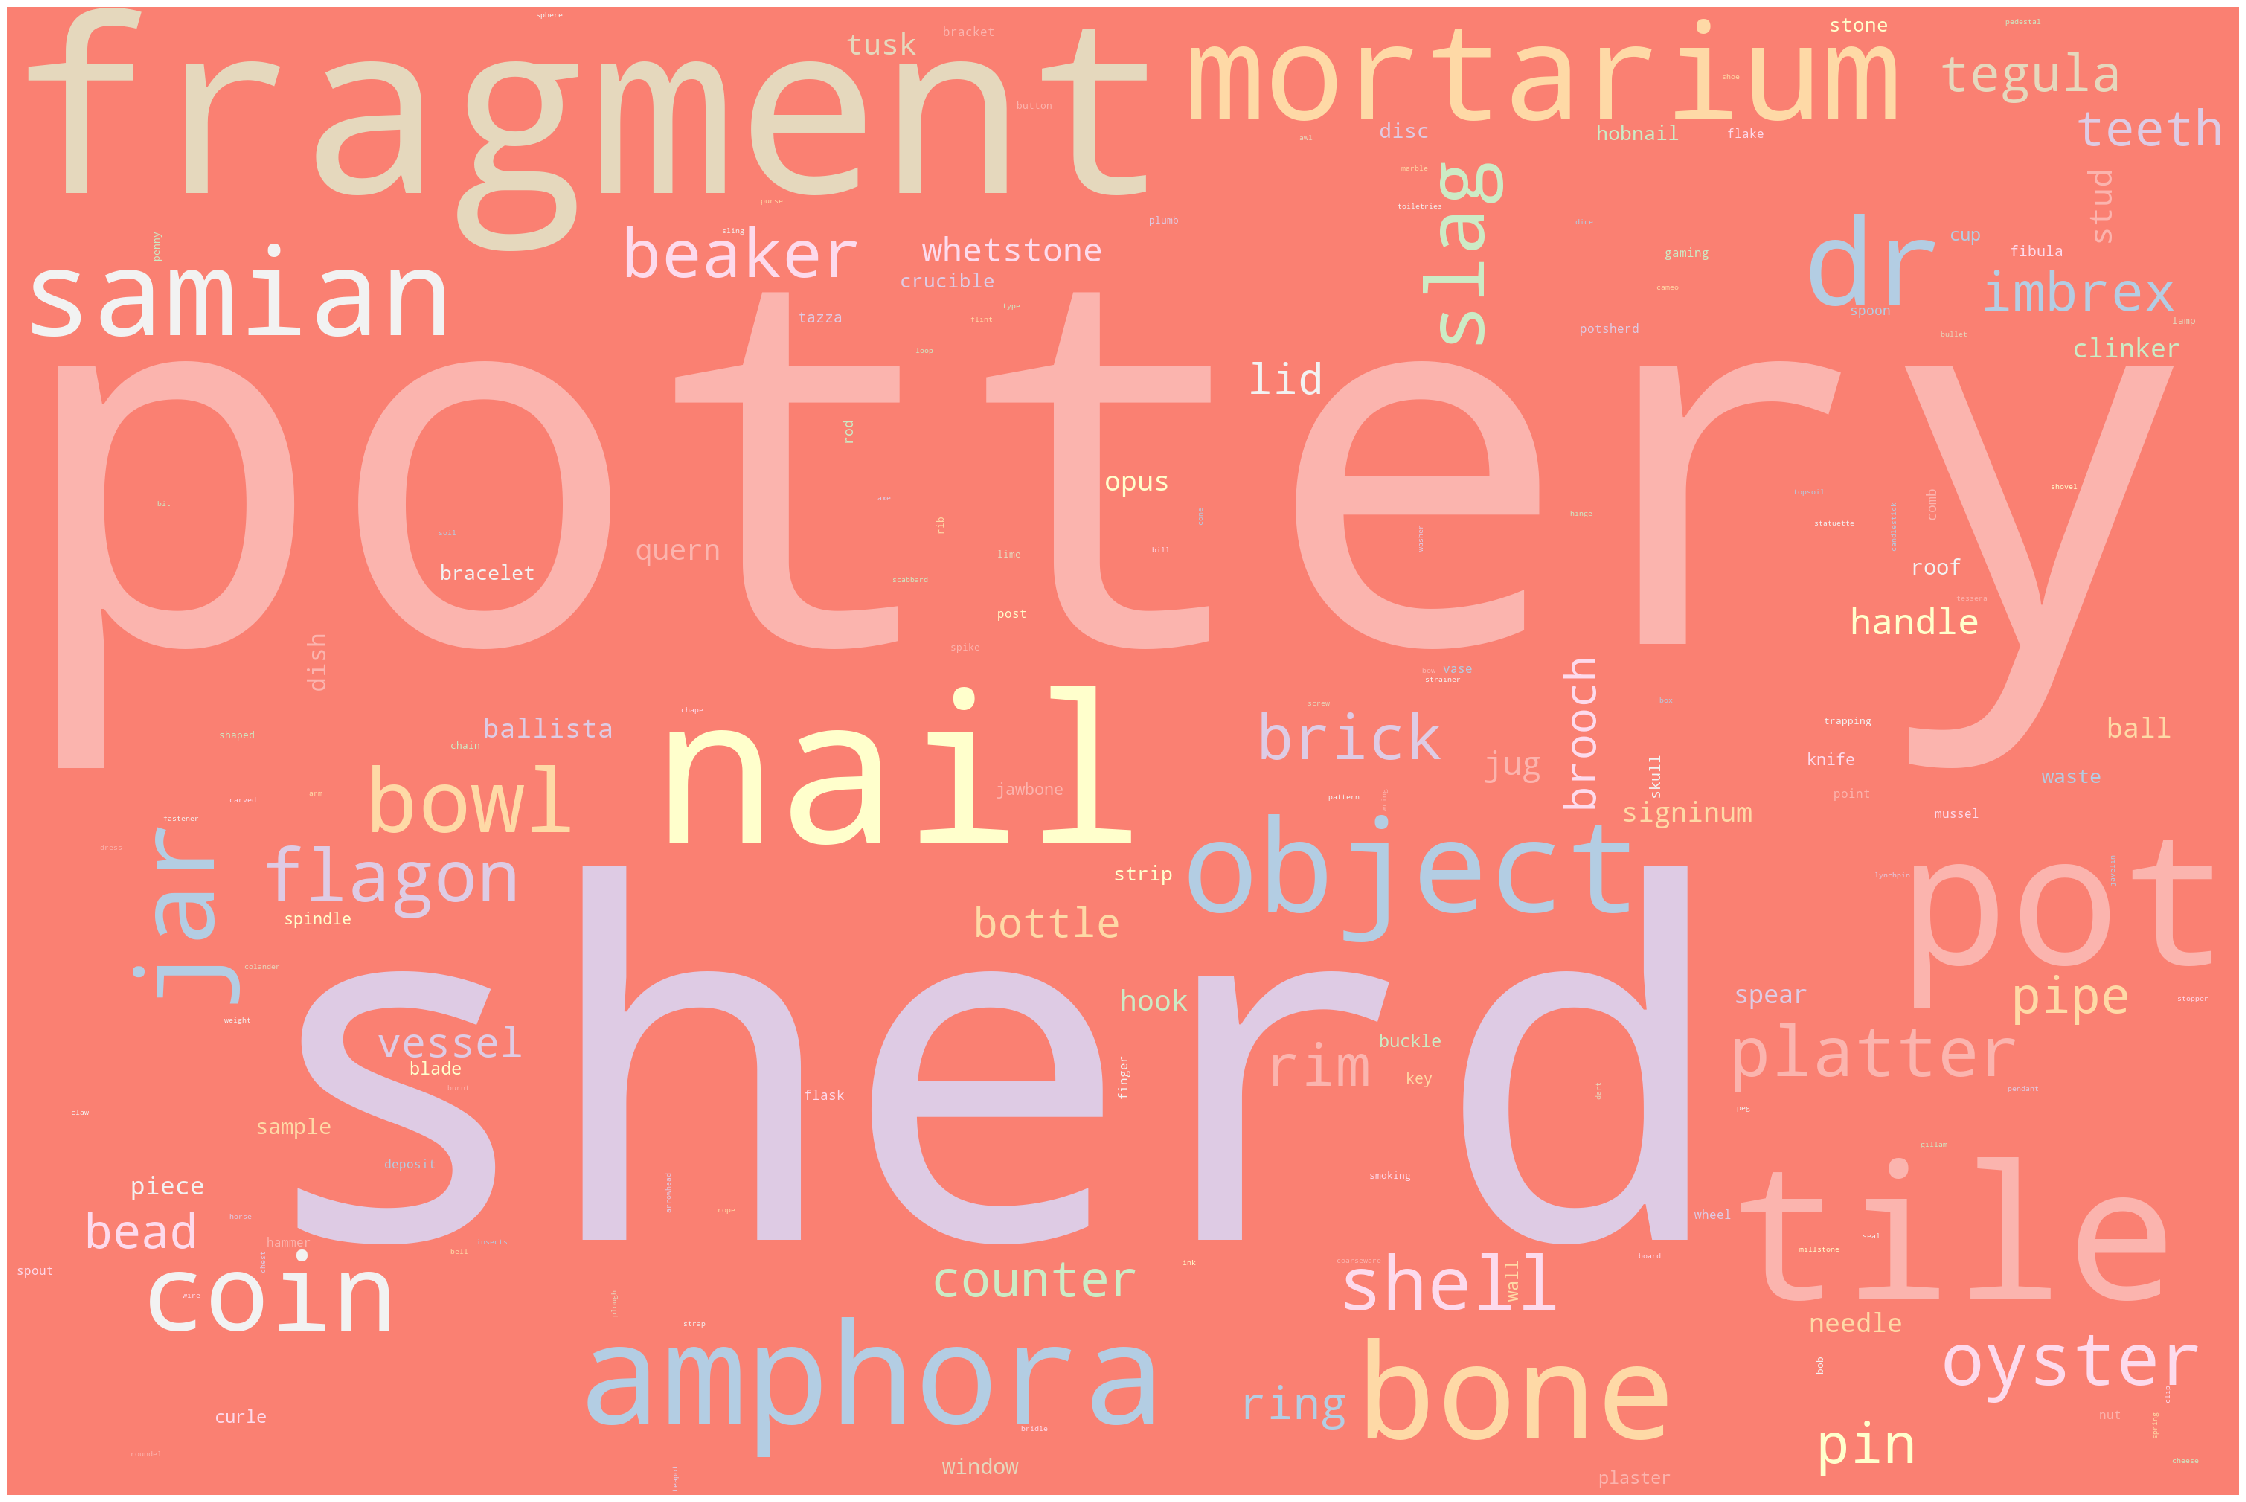

In [7]:
objects = list(df[df.Object.notnull()].Object)
objects_text = ' '.join(objects)

plot_cloud(objects_text)

### Materials

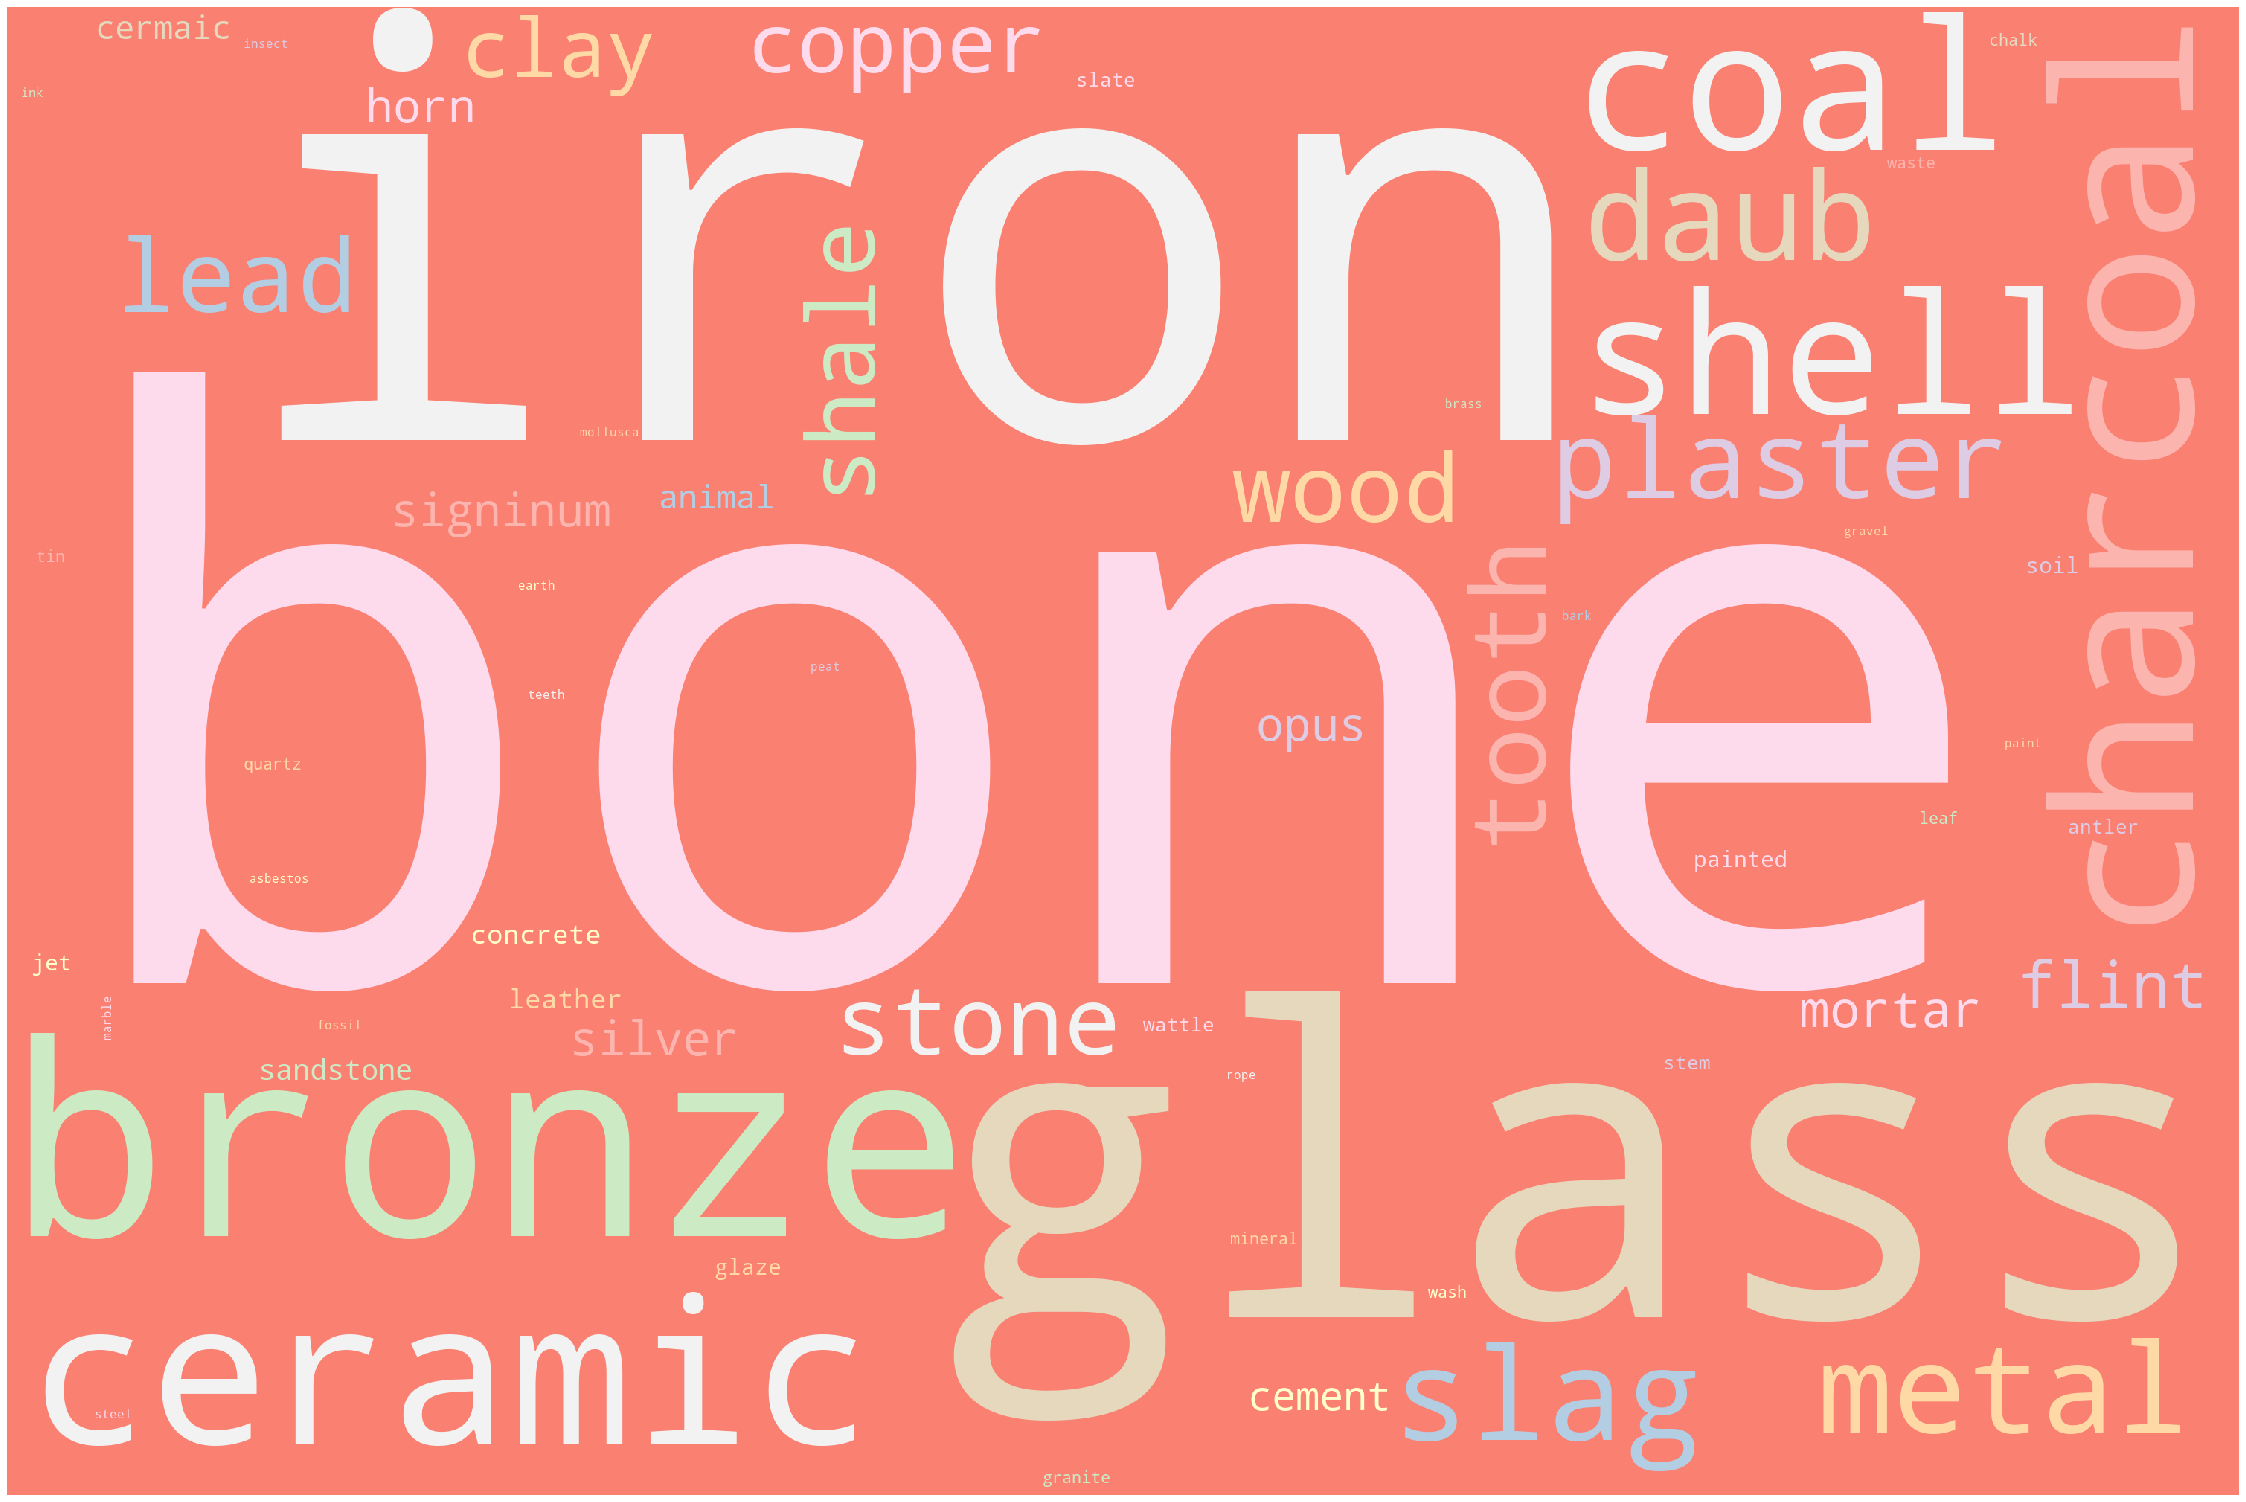

In [8]:
materials = list(df[df.Material.notnull()].Material)
materials_text = ' '.join(materials)

plot_cloud(materials_text)

### Fabrics

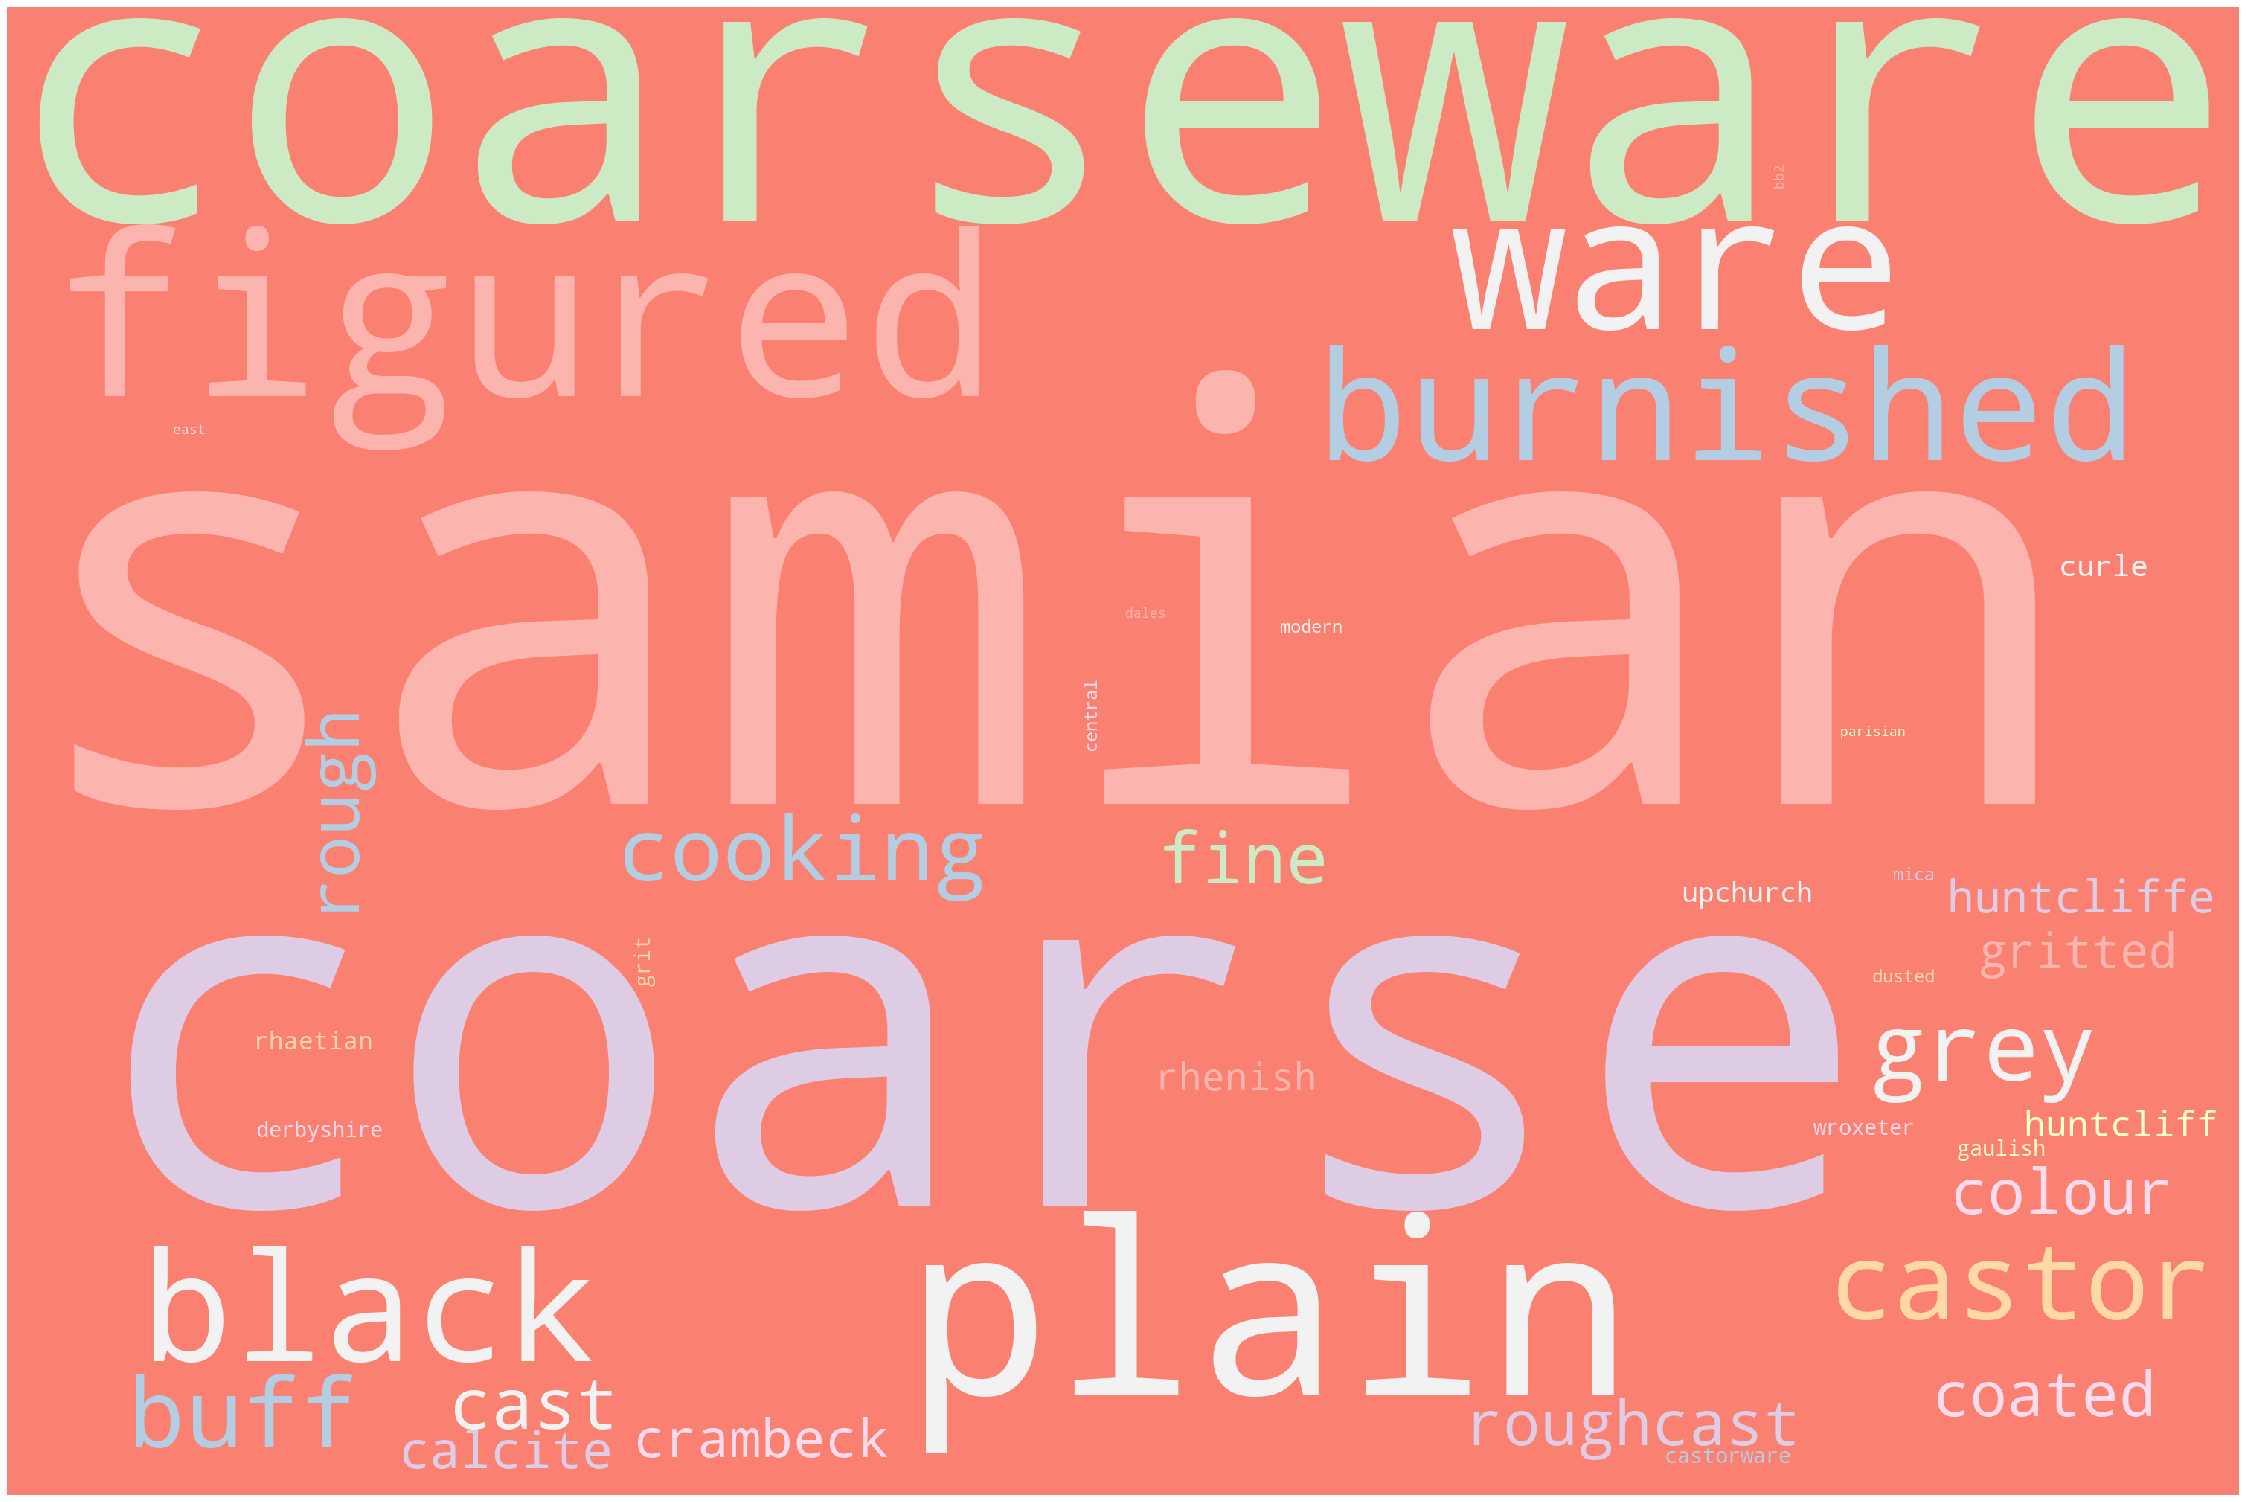

In [9]:
fabrics = list(df[df.Fabric.notnull()].Fabric)
fabrics_text = ' '.join(fabrics)

plot_cloud(fabrics_text)

# Plot histograms for the distribution of word frequencies

### Objects

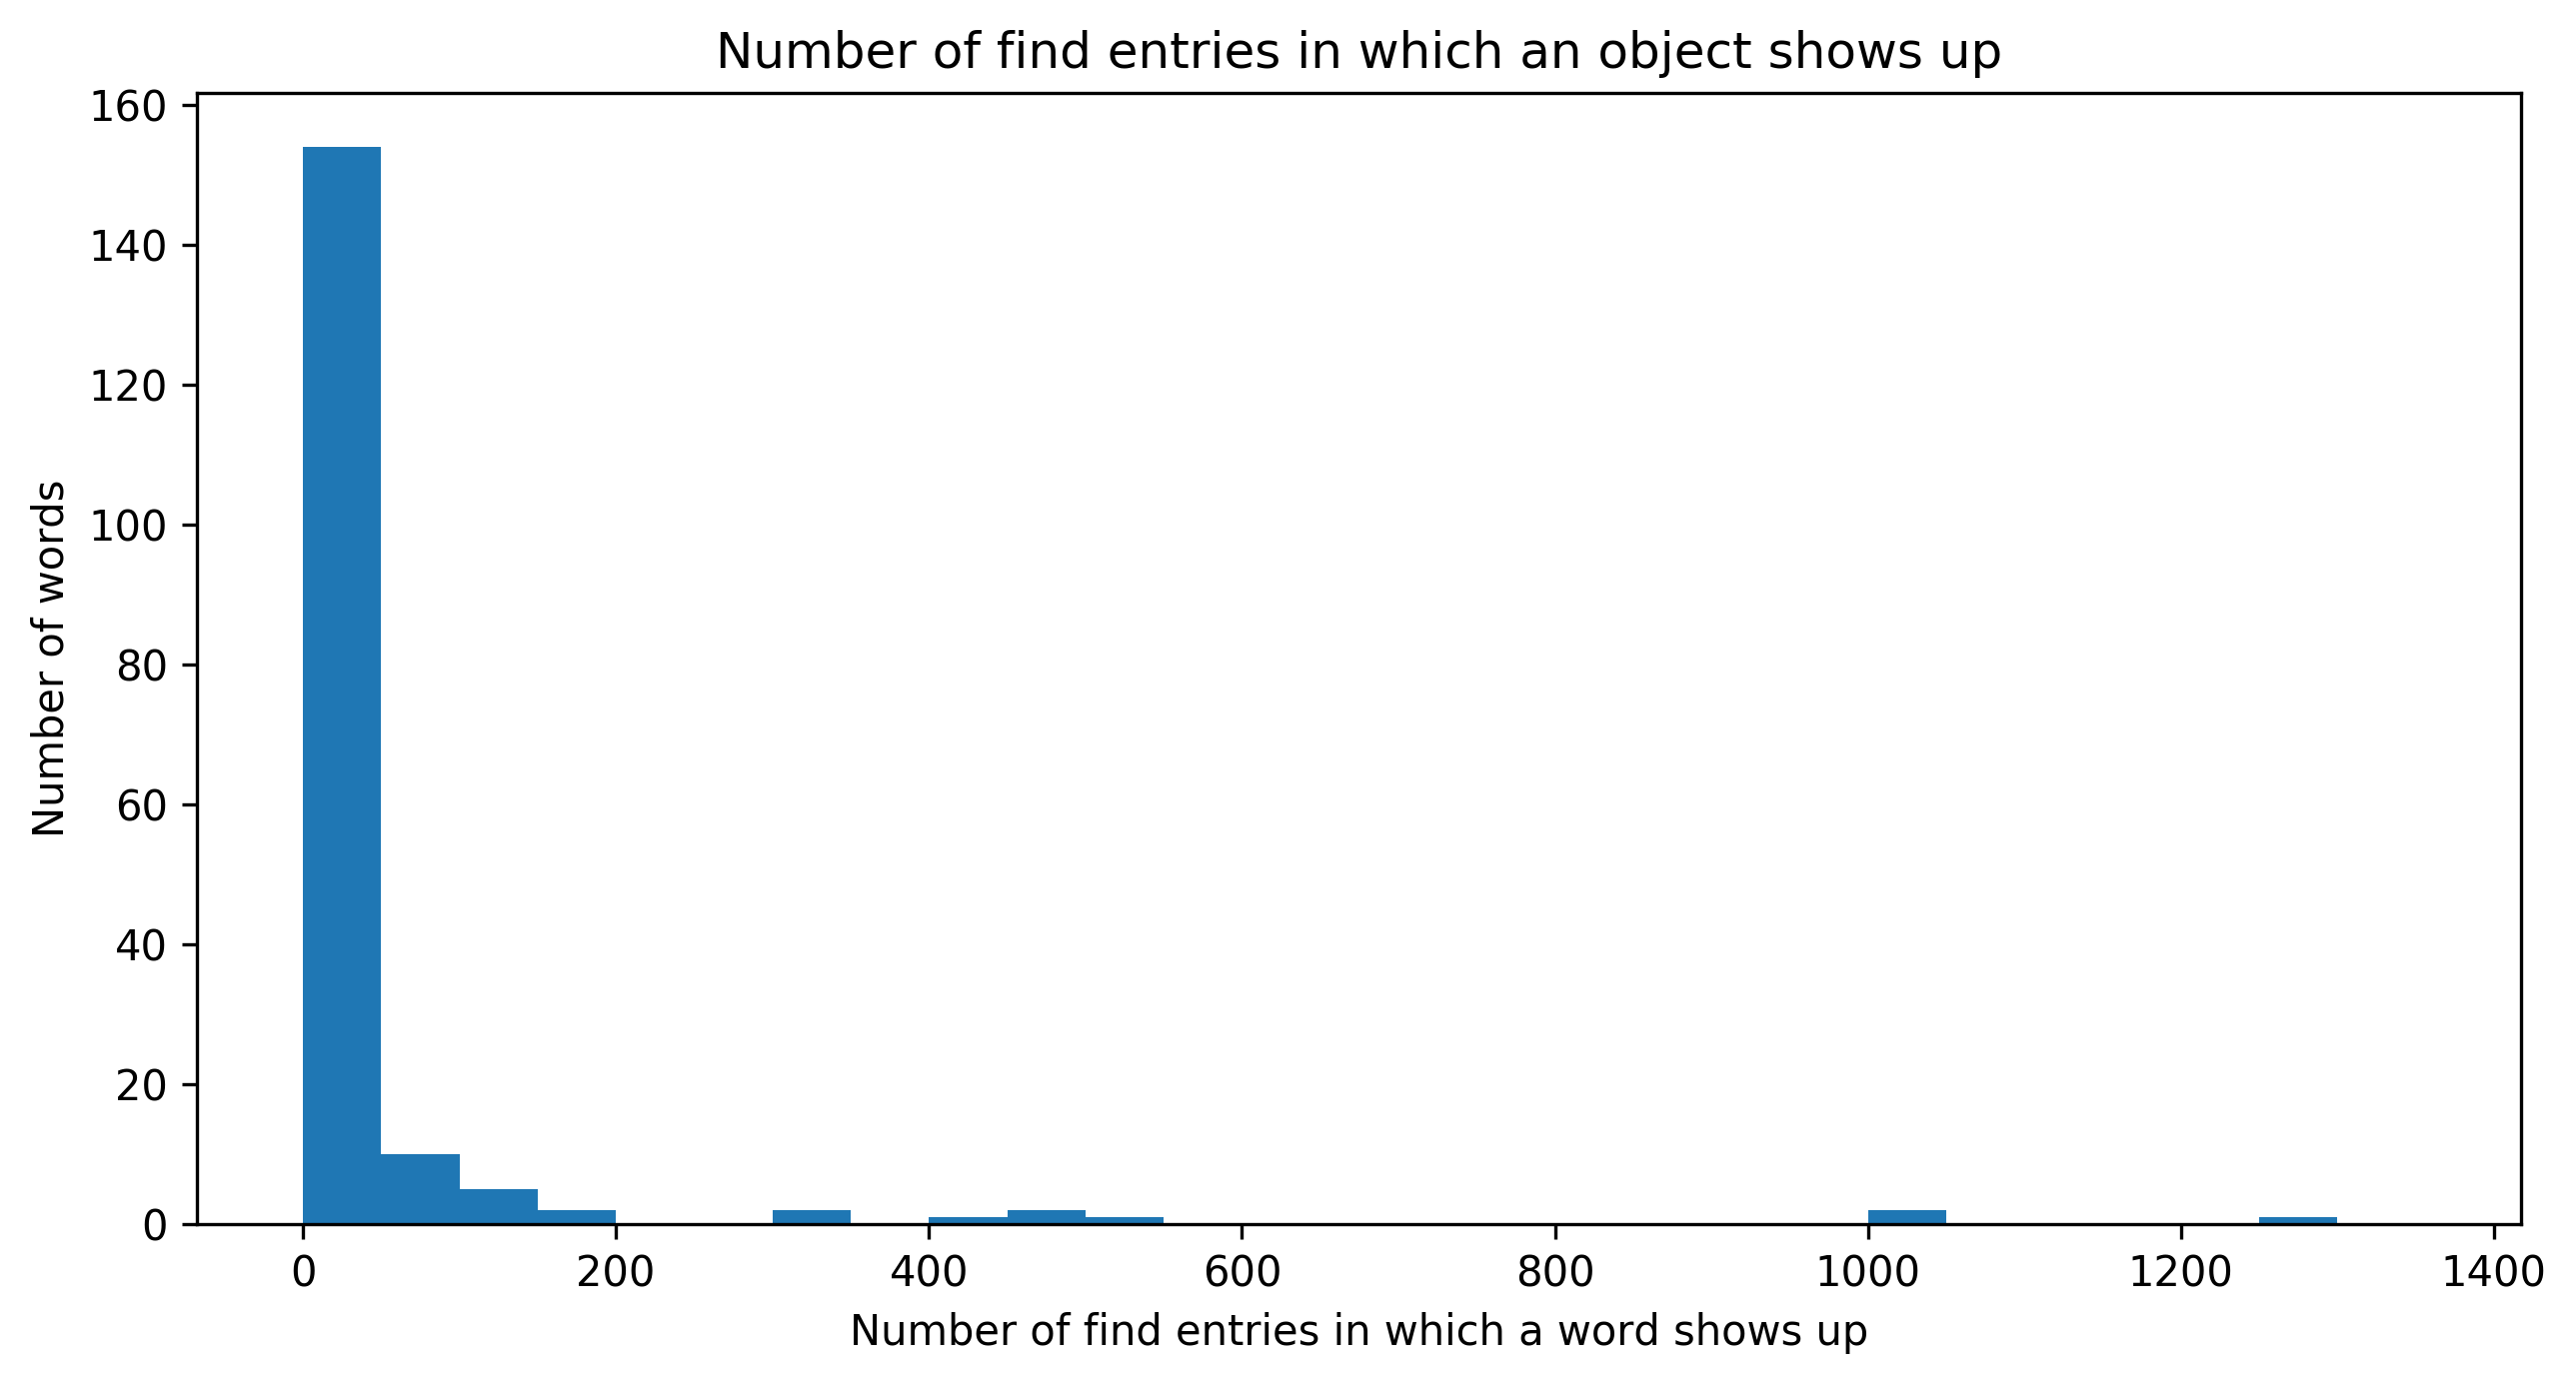

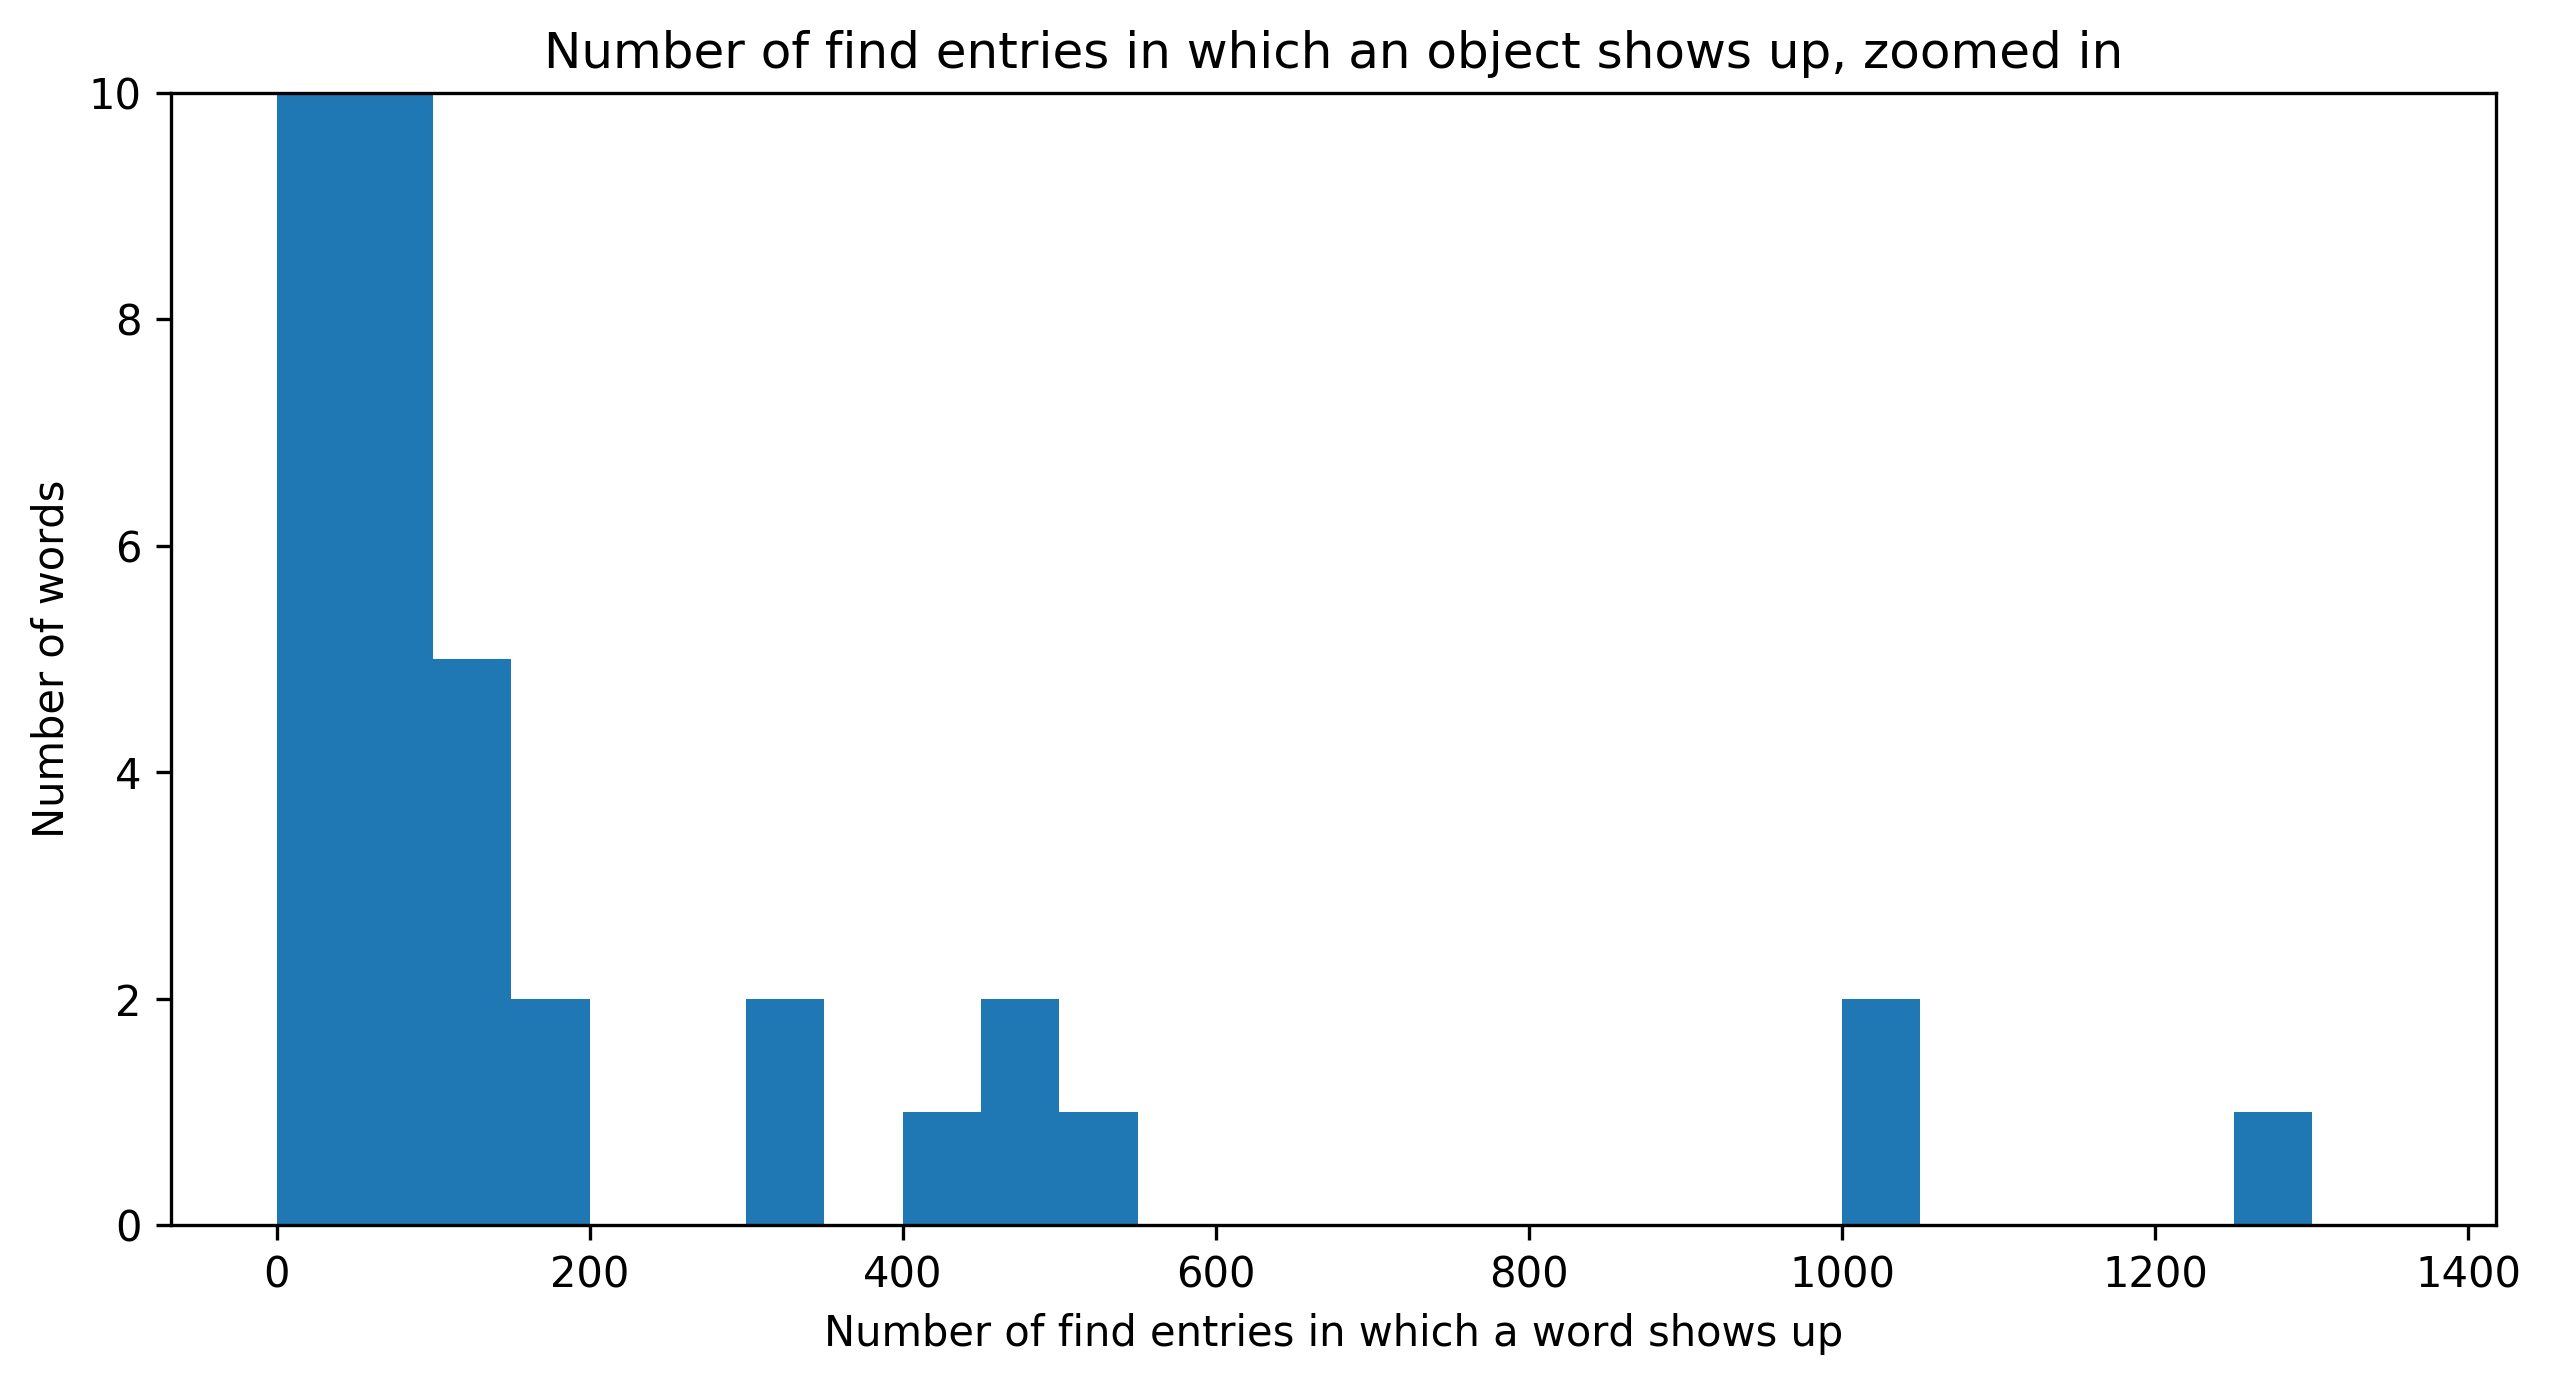

In [10]:
object_counts = Counter(objects)

ticks = np.arange(0, 1400, 50)
        
plt.figure(figsize=(10,5), dpi=300)
plt.hist(object_counts.values(), bins=ticks)
plt.xlabel('Number of find entries in which a word shows up')
plt.ylabel('Number of words')
plt.title('Number of find entries in which an object shows up')
plt.show()

plt.figure(figsize=(10,5), dpi=300)
plt.hist(object_counts.values(), bins=ticks)
plt.xlabel('Number of find entries in which a word shows up')
plt.ylabel('Number of words')
plt.ylim(0, 10)
plt.title('Number of find entries in which an object shows up, zoomed in')
plt.show()

**Takeaways:** Most objects show up in just a few find entries. 2 objects show up around a thousand times.

### Materials

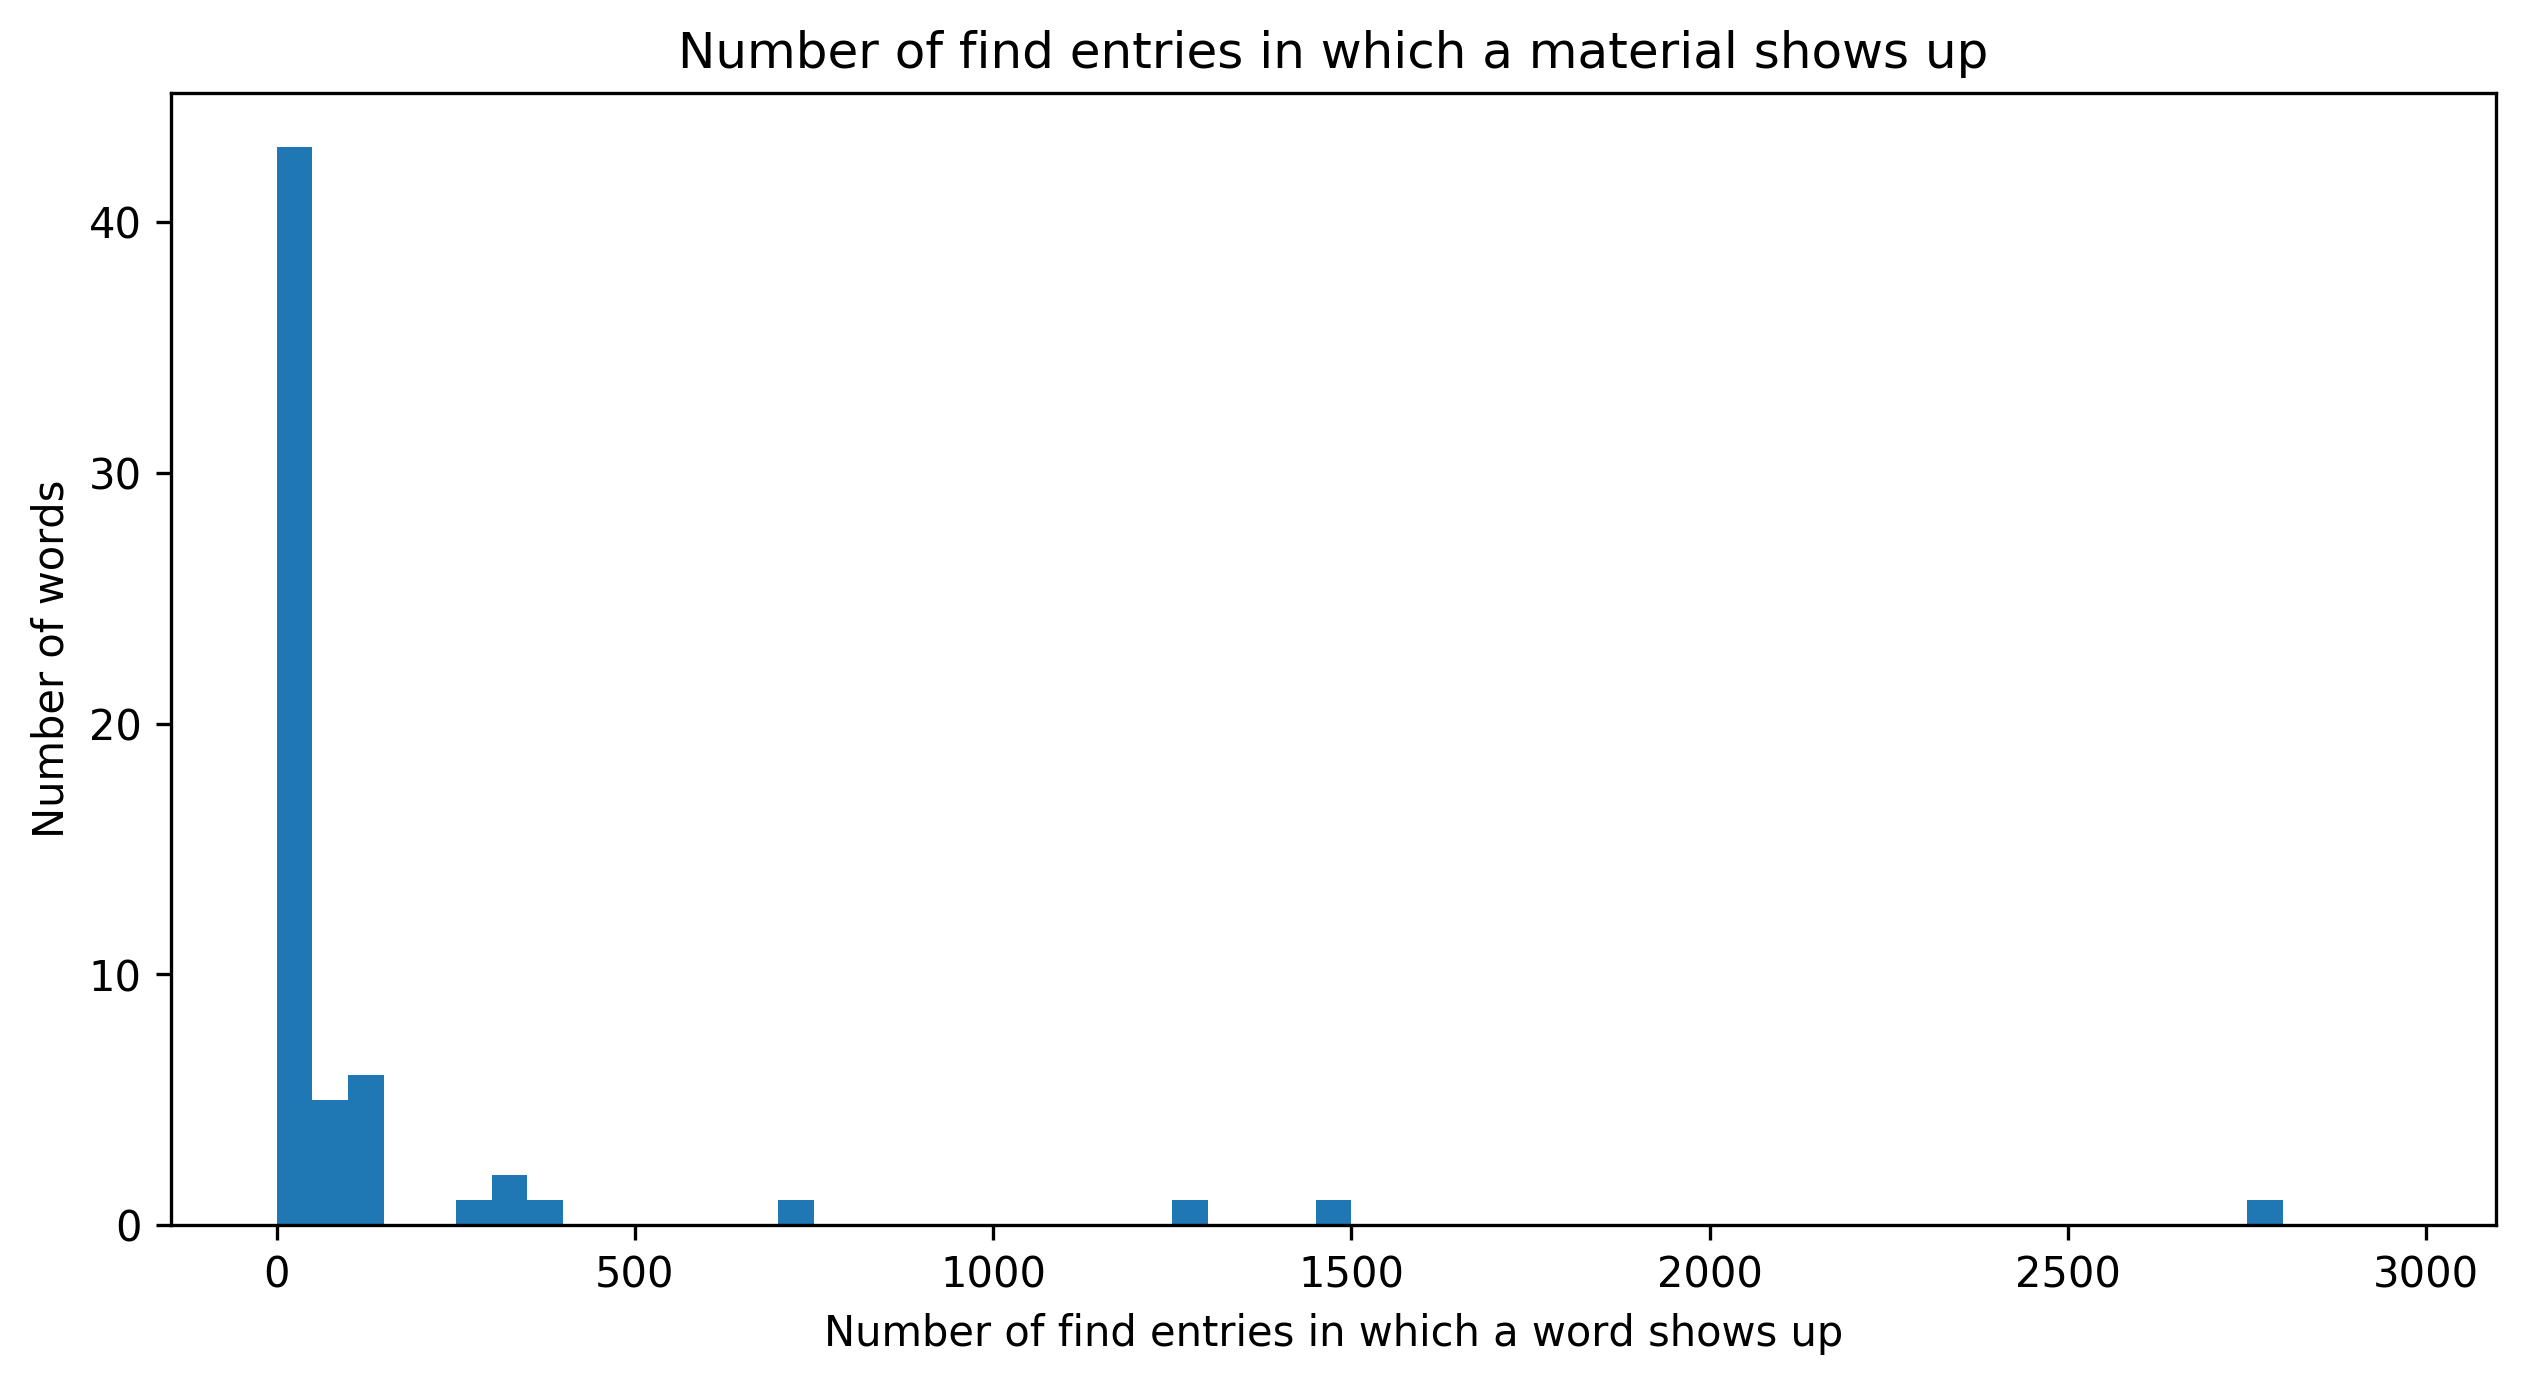

In [11]:
material_counts = Counter(materials)
ticks = np.arange(0, 3000, 50)
plt.figure(figsize=(10,5), dpi=300)
plt.hist(material_counts.values(), bins=ticks)
plt.xlabel('Number of find entries in which a word shows up')
plt.ylabel('Number of words')
plt.title('Number of find entries in which a material shows up')
plt.show()

**Takeaways:** Most materials show up in just a few find entries. A few materials show up more than a thousand times.

### Fabrics

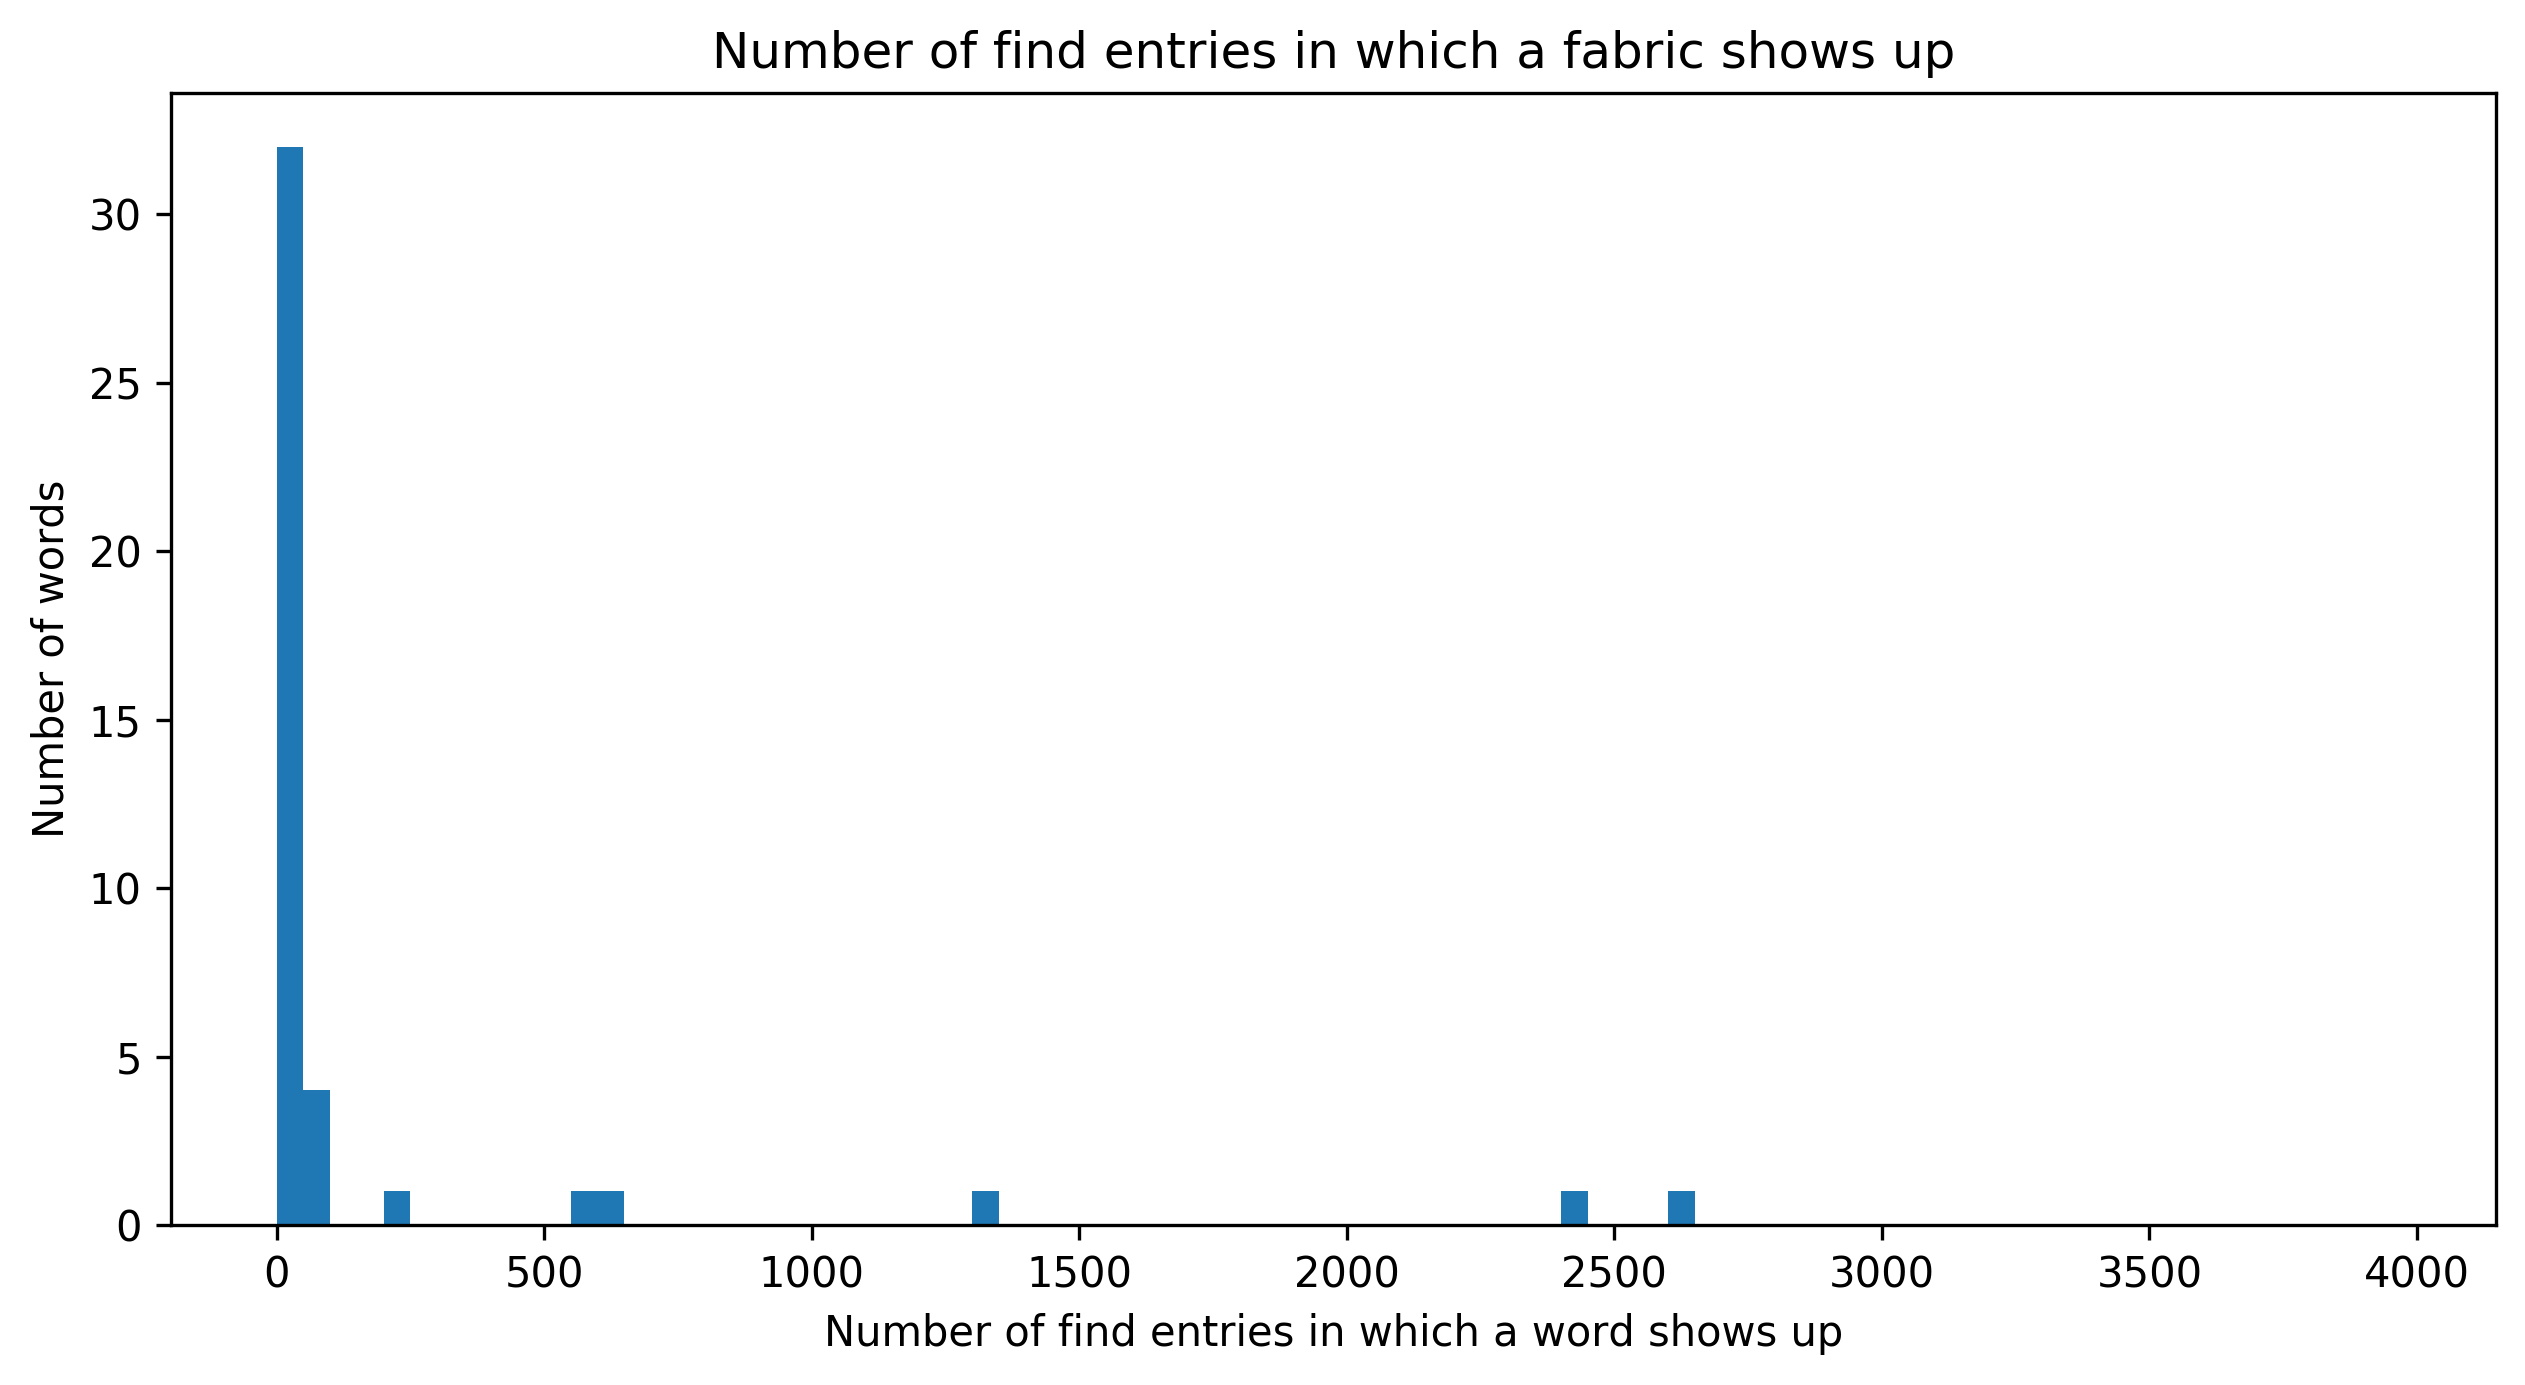

In [12]:
fabric_counts = Counter(fabrics)
ticks = np.arange(0, 4000, 50)
plt.figure(figsize=(10,5), dpi=300)
plt.hist(fabric_counts.values(), bins=ticks)
plt.xlabel('Number of find entries in which a word shows up')
plt.ylabel('Number of words')
plt.title('Number of find entries in which a fabric shows up')
plt.show()

**Takeaways:** Most fabrics show up in just a few find entries. A few fabrics show up more than 2500 times.

## Plot bar charts and pie charts to compare the number of finds in which the most common words show up

In [13]:
# drop entries with value less than n
def trim(original_dict, n):
    new_dict = {}
    for key in original_dict:
        if original_dict[key] > n:
            new_dict[key] = original_dict[key]
    return new_dict

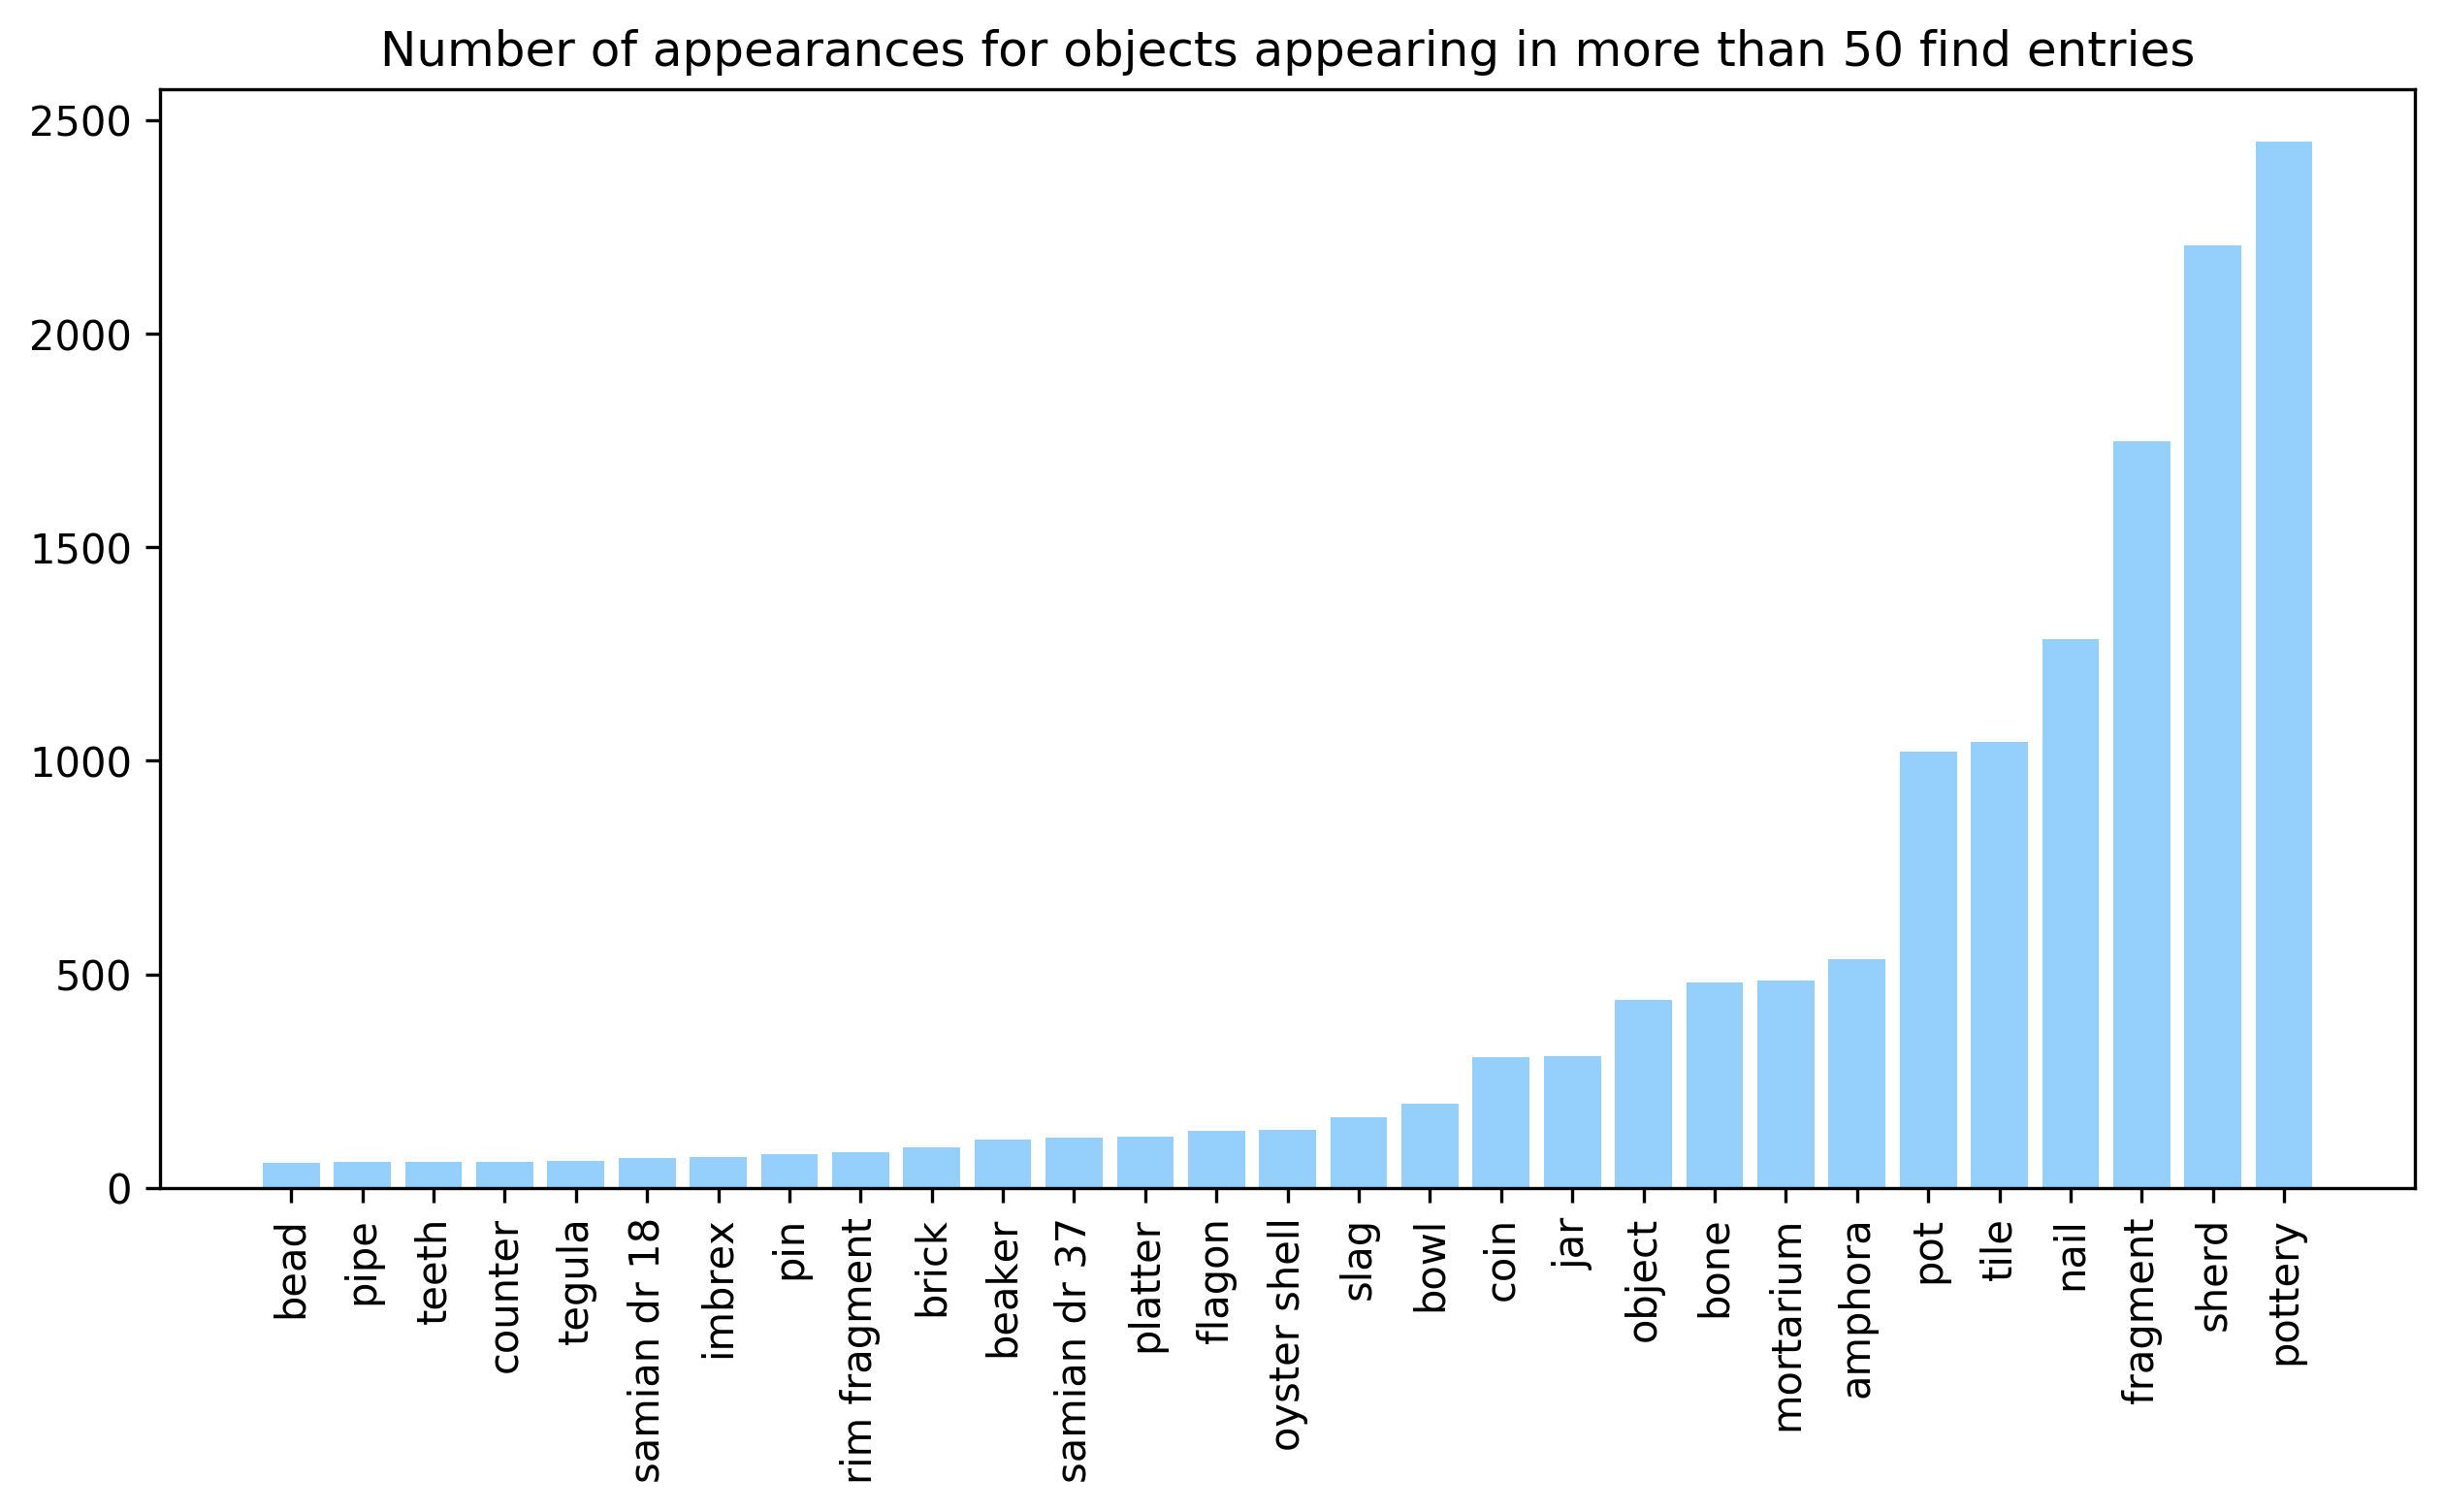

In [14]:
n = 50
object_counts_trimmed = trim(object_counts, n)
object_counts_plot = {k: v for k, v in sorted(object_counts_trimmed.items(), key=lambda item: item[1])}
plt.figure(figsize=(10,5), dpi=300)
plt.bar(object_counts_plot.keys(), object_counts_plot.values(), color='xkcd:light blue')
plt.xticks(rotation=90)
plt.title('Number of appearances for objects appearing in more than %d find entries' % n)
plt.show()

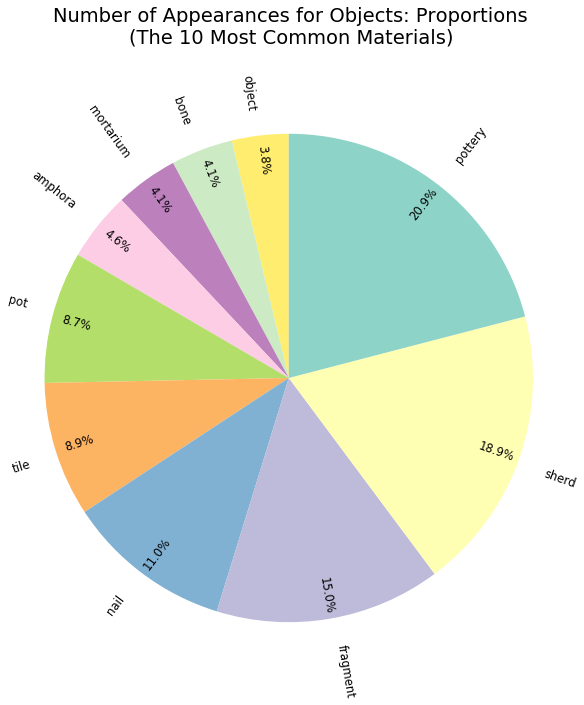

In [15]:
data = object_counts_plot
n = 10
title = 'Number of Appearances for Objects: Proportions\n(The %d Most Common Materials)\n\n\n' % n
plot_pie(data, n, title)

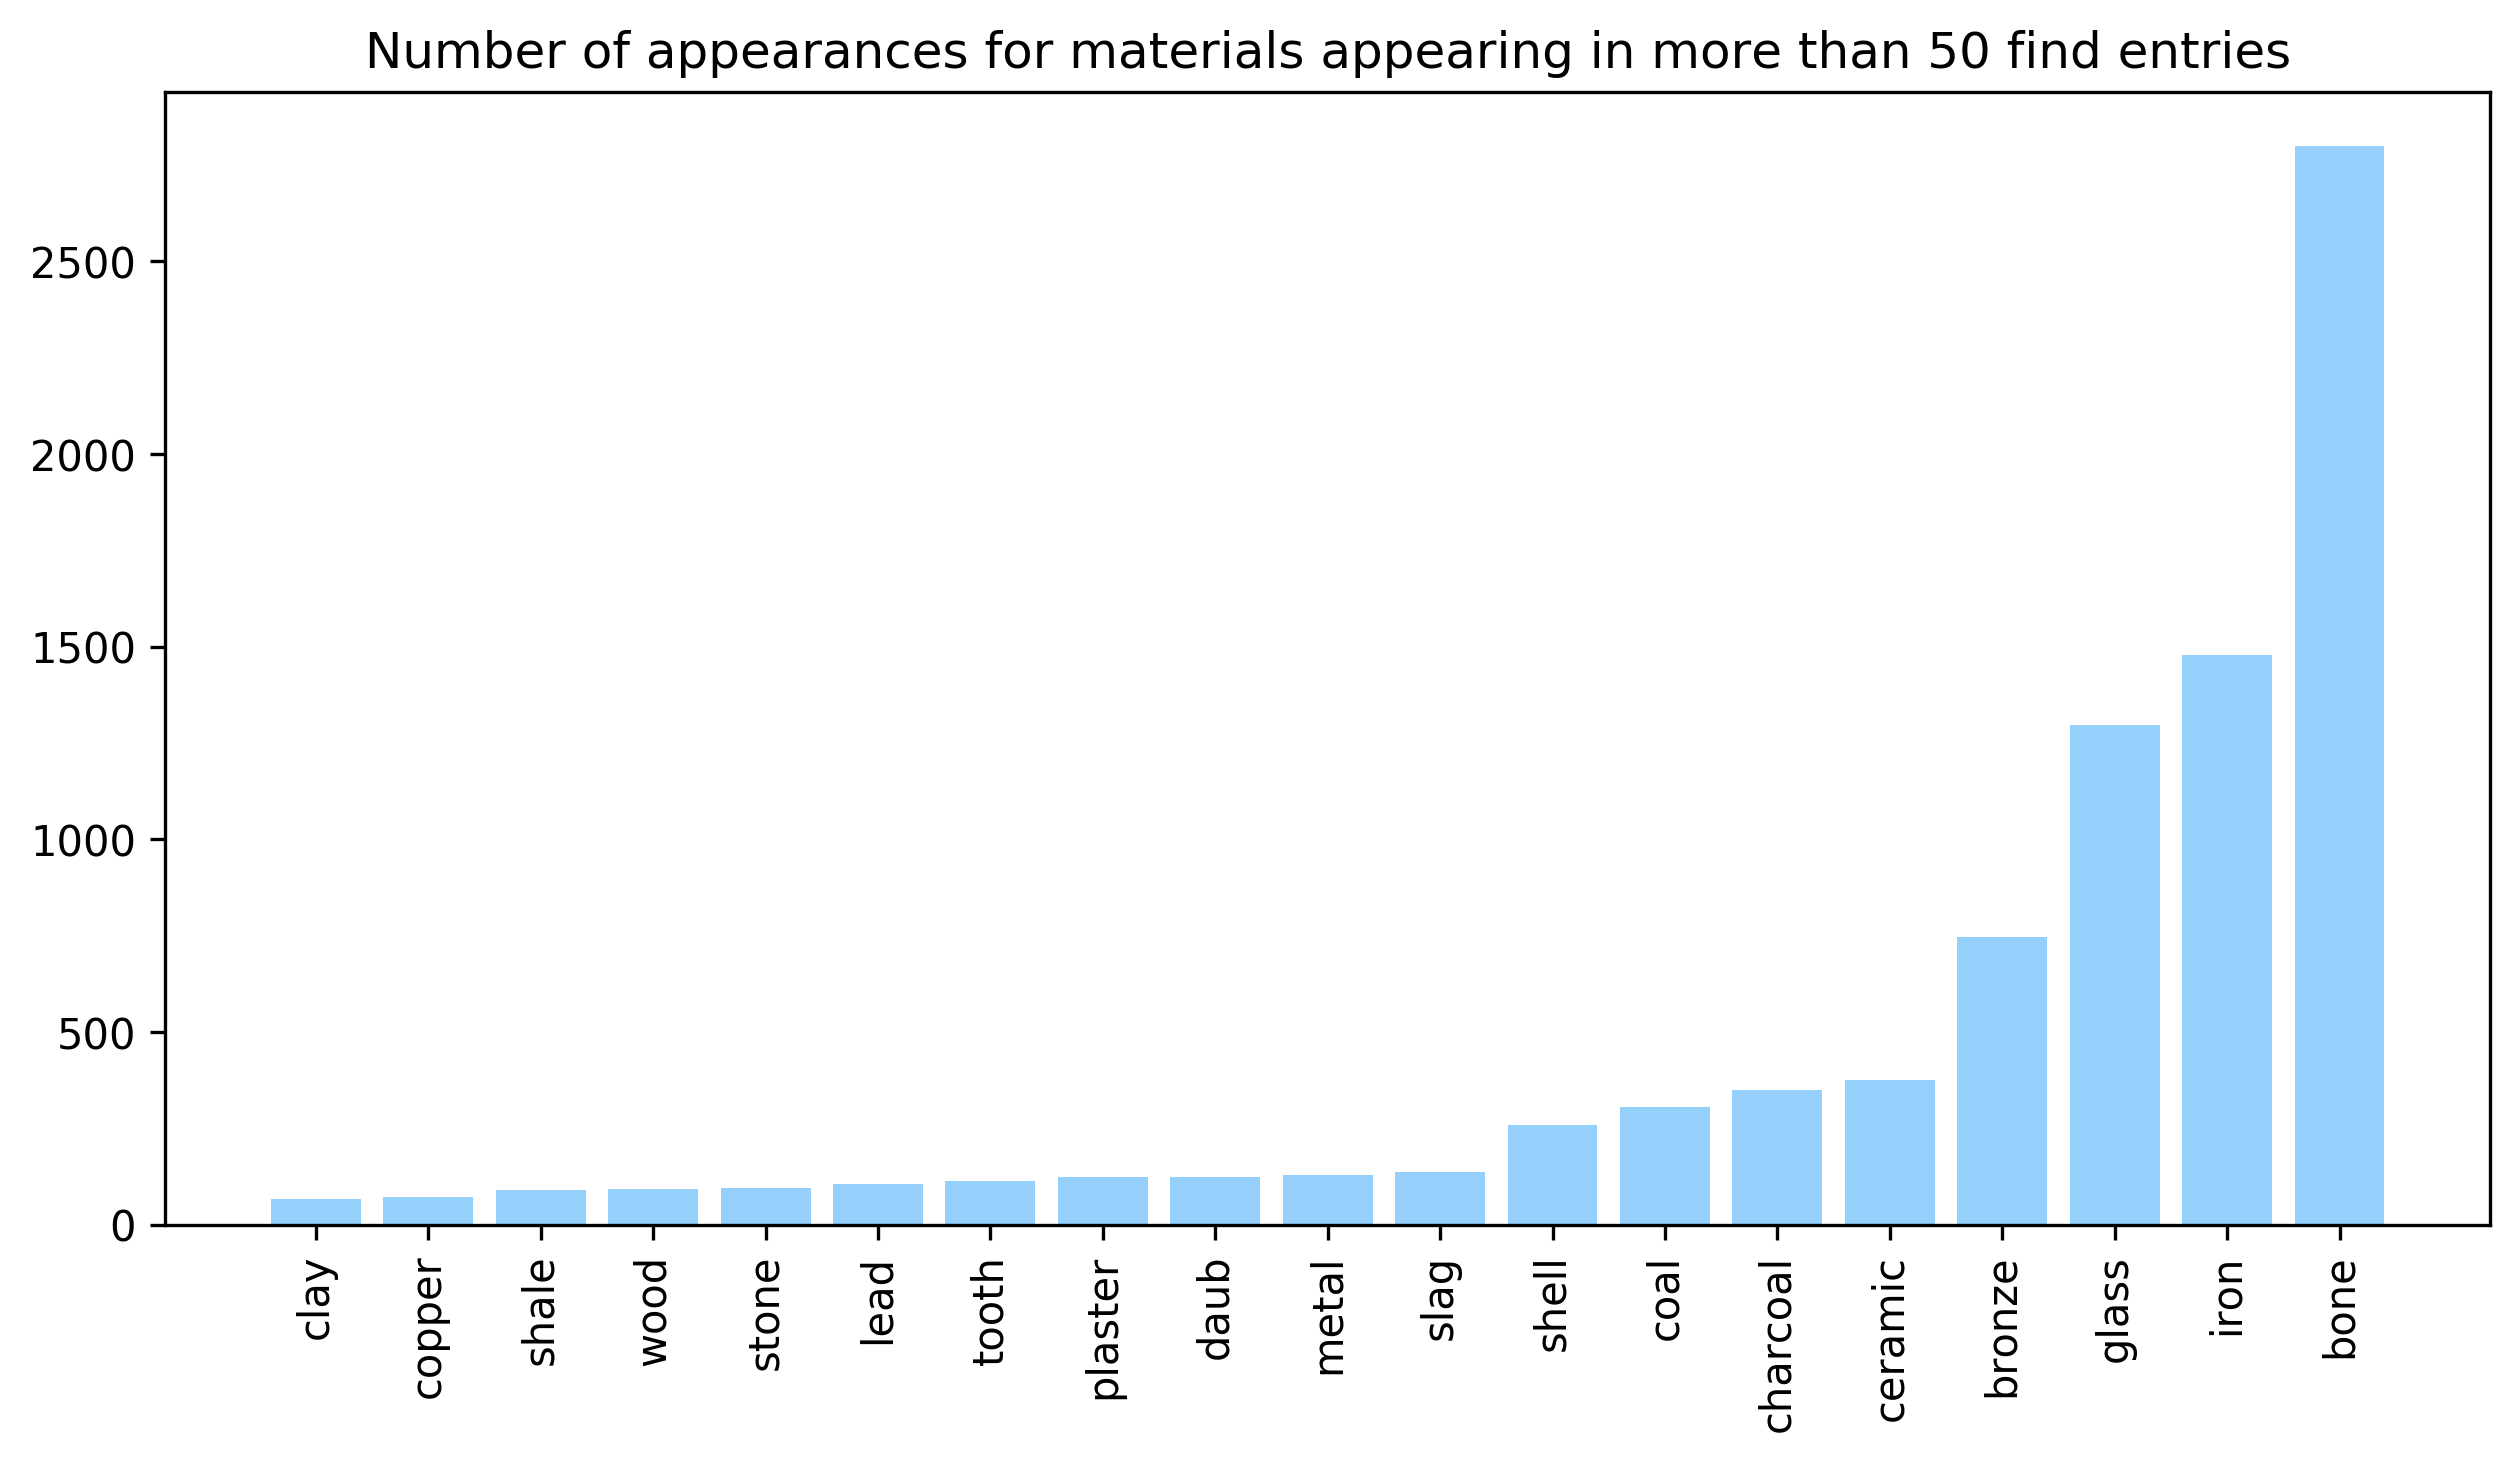

In [16]:
n = 50
material_counts_trimmed = trim(material_counts, n)
material_counts_plot = {k: v for k, v in sorted(material_counts_trimmed.items(), key=lambda item: item[1])}
plt.figure(figsize=(10,5), dpi=300)
plt.bar(material_counts_plot.keys(), material_counts_plot.values(), color='xkcd:light blue')
plt.xticks(rotation=90)
plt.title('Number of appearances for materials appearing in more than %d find entries' % n)
plt.show()

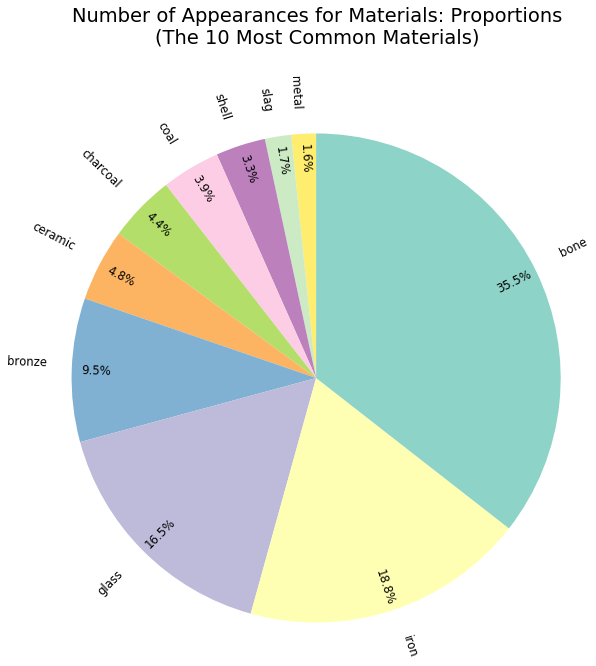

In [17]:
data = material_counts_plot
n = 10
title = 'Number of Appearances for Materials: Proportions\n(The %d Most Common Materials)\n\n\n' % n
plot_pie(data, n, title)

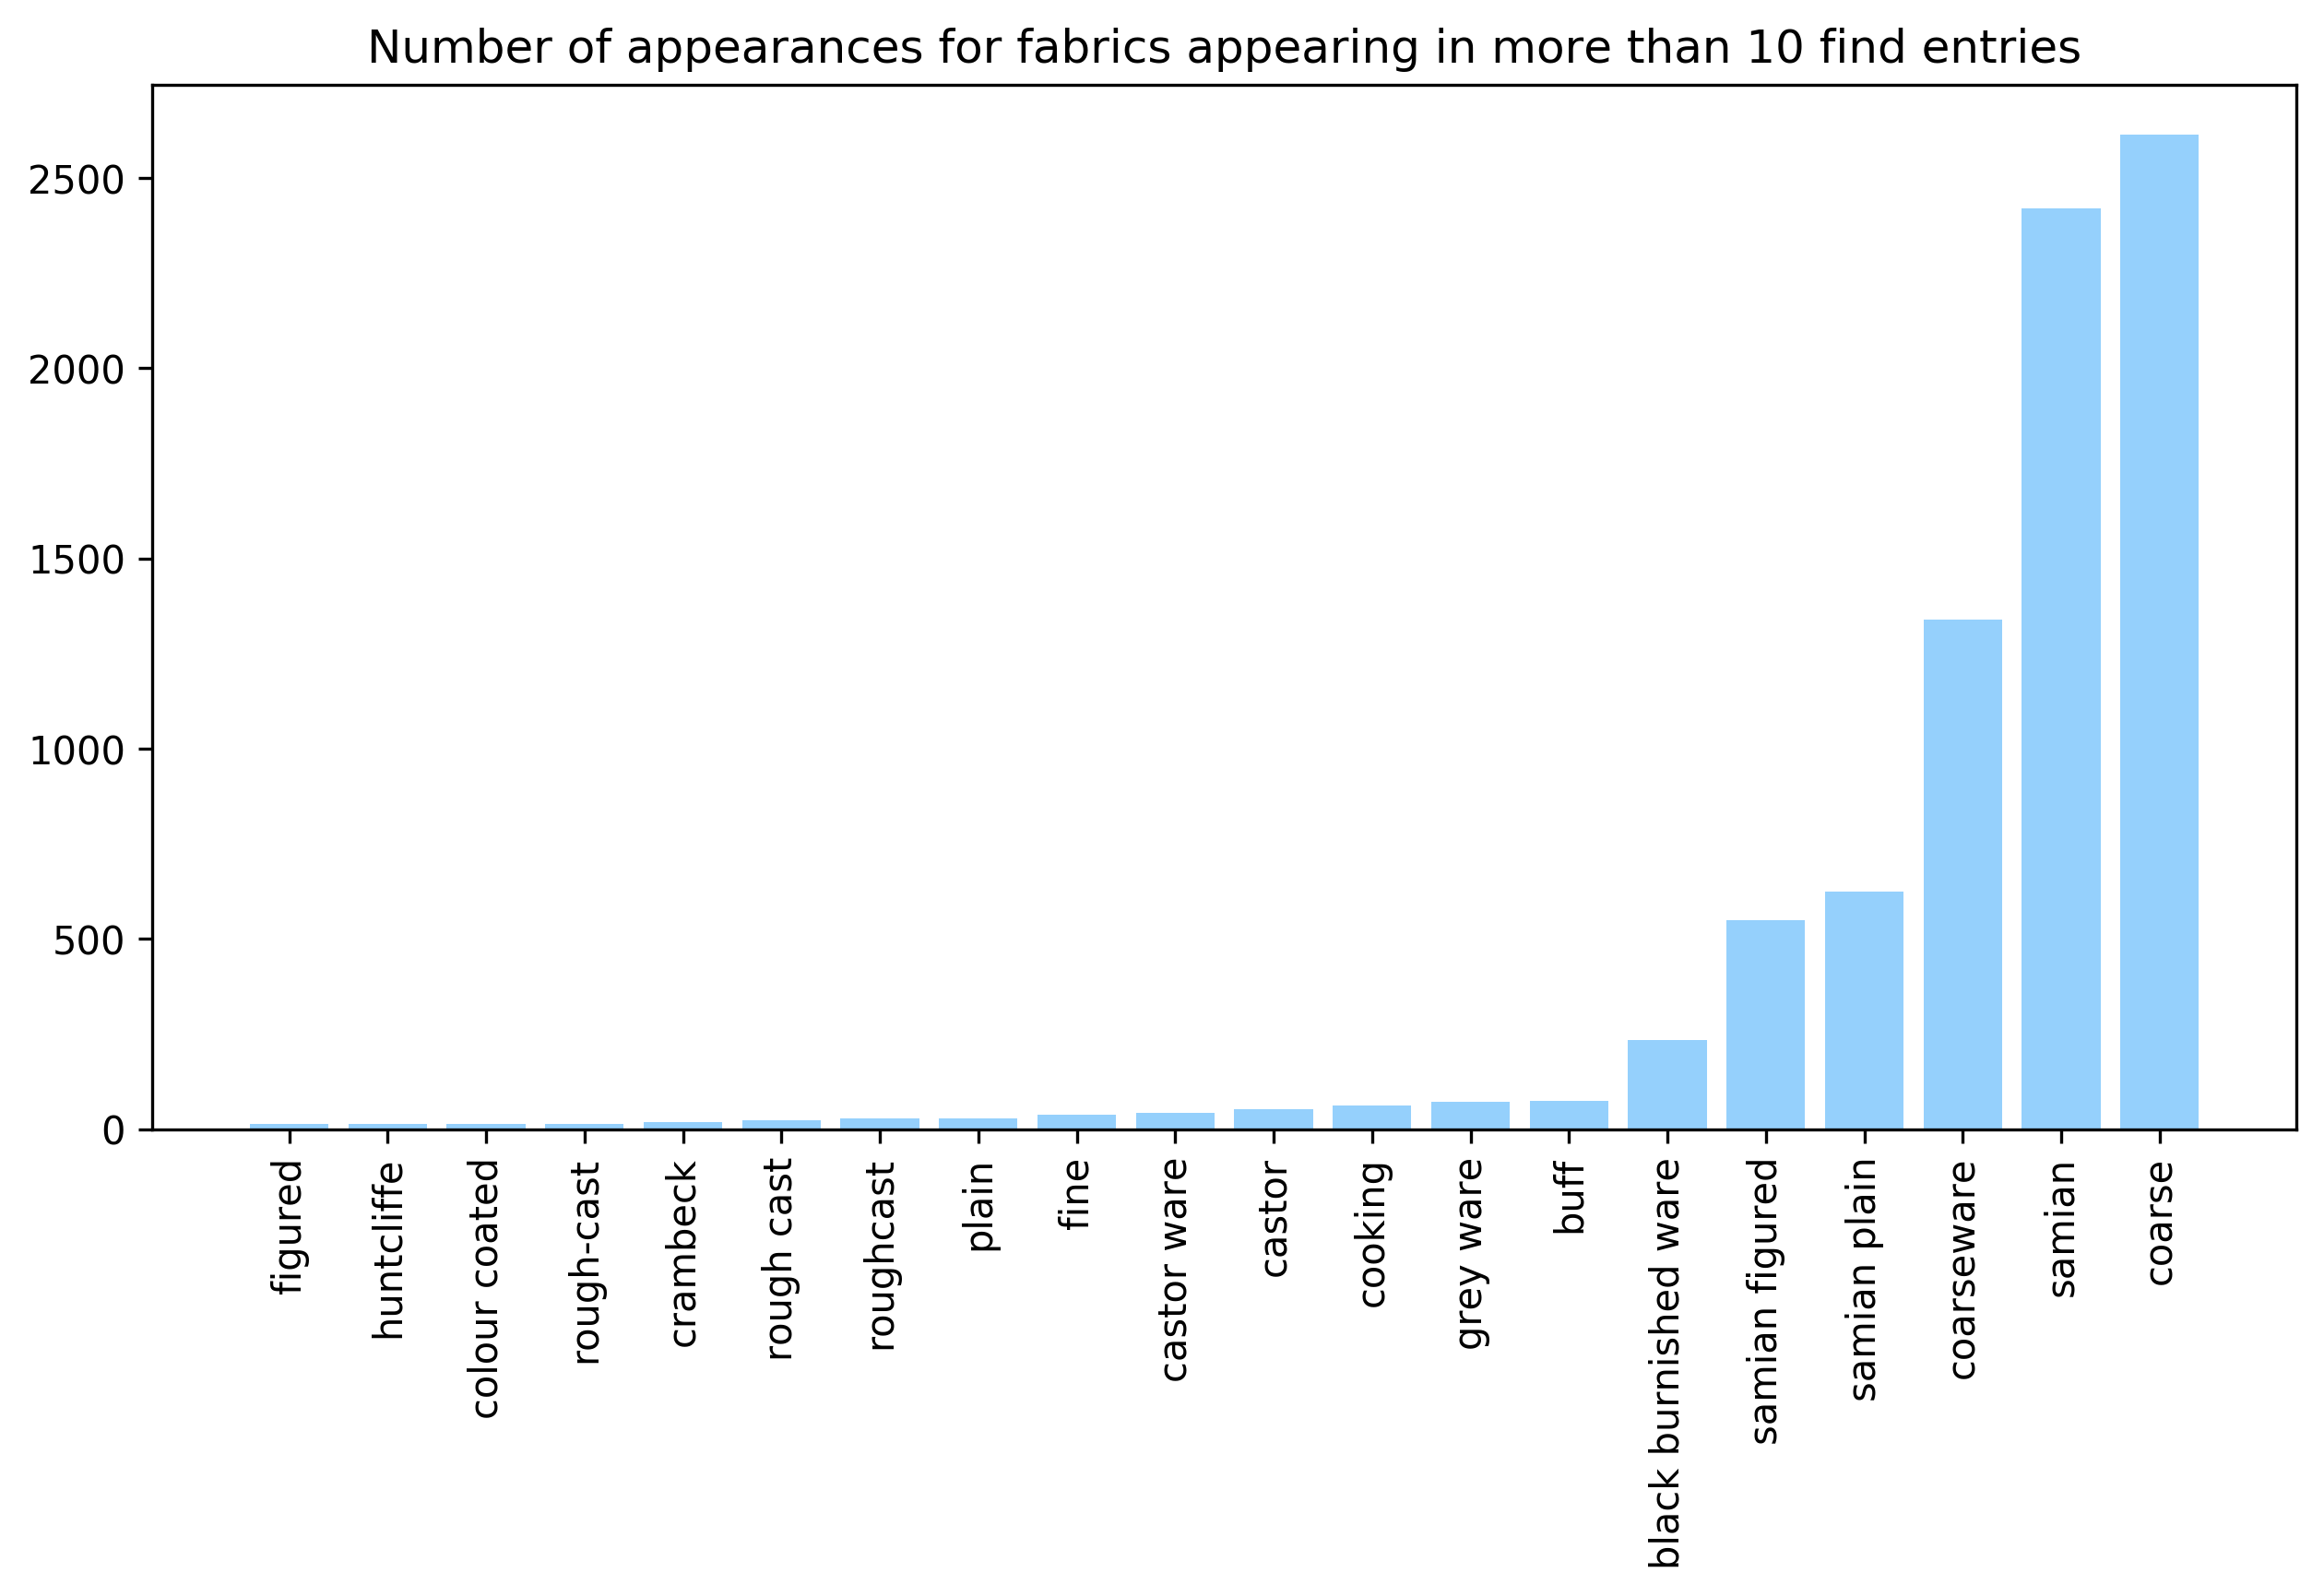

In [18]:
n = 10
fabric_counts_trimmed = trim(fabric_counts, n)
fabric_counts_plot = {k: v for k, v in sorted(fabric_counts_trimmed.items(), key=lambda item: item[1])}
plt.figure(figsize=(10,5), dpi=300)
plt.bar(fabric_counts_plot.keys(), fabric_counts_plot.values(), color='xkcd:light blue')
plt.xticks(rotation=90)
plt.title('Number of appearances for fabrics appearing in more than %d find entries' % n)
plt.show()

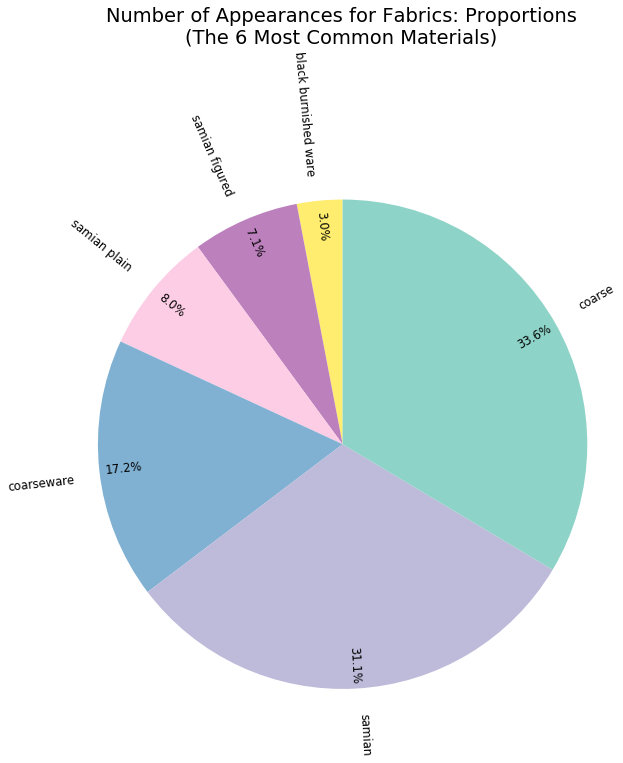

In [19]:
data = fabric_counts_plot
n = 6
title = 'Number of Appearances for Fabrics: Proportions\n(The %d Most Common Materials)\n\n\n\n\n\n' % n
plot_pie(data, n, title)

# Calculate and plot object total quantities

Plot total quantities for the most common objects (here defined as objects that appear in more than 50 finds entries) using values in the `Quantity` column of the extraction spreadsheet, not just how many find entries an object shows up in.

For each object, total quantity = the sum total of available quantities + however many rows do not have available quantities.

In [20]:
# Calculate
object_total_quantities = {}
for obj in object_counts_trimmed:
    print('---------------')
    print('obj: ', obj)
    df_obj = df[df.Object==obj]
    df_obj_count_available = df_obj[df_obj.Quantity.notnull()]
    singles_count = len(df_obj) - len(df_obj_count_available)
    object_total_quantities[obj] = sum(df_obj_count_available.Quantity) + singles_count
    print('sum of available counts:', sum(df_obj_count_available.Quantity))
    print('number of unavailable counts: ', singles_count)
    print('total quantity: ', object_total_quantities[obj])

---------------
obj:  sherd
sum of available counts: 16901.0
number of unavailable counts:  41
total quantity:  16942.0
---------------
obj:  fragment
sum of available counts: 5432.0
number of unavailable counts:  626
total quantity:  6058.0
---------------
obj:  tile
sum of available counts: 379.0
number of unavailable counts:  900
total quantity:  1279.0
---------------
obj:  flagon
sum of available counts: 227.0
number of unavailable counts:  62
total quantity:  289.0
---------------
obj:  nail
sum of available counts: 2373.0
number of unavailable counts:  607
total quantity:  2980.0
---------------
obj:  pottery
sum of available counts: 17980.0
number of unavailable counts:  1075
total quantity:  19055.0
---------------
obj:  object
sum of available counts: 208.0
number of unavailable counts:  331
total quantity:  539.0
---------------
obj:  pin
sum of available counts: 25.0
number of unavailable counts:  59
total quantity:  84.0
---------------
obj:  mortarium
sum of available cou

In [21]:
object_total_quantities_plot = {k: int(v) for k, v in sorted(object_total_quantities.items(), key=lambda item: item[1])}
object_total_quantities_plot

{'bead': 60,
 'tegula': 78,
 'imbrex': 82,
 'pin': 84,
 'pipe': 84,
 'teeth': 109,
 'brick': 111,
 'rim fragment': 124,
 'samian dr 18': 127,
 'counter': 137,
 'oyster shell': 147,
 'slag': 170,
 'samian dr 37': 226,
 'beaker': 282,
 'flagon': 289,
 'bowl': 323,
 'coin': 337,
 'platter': 458,
 'object': 539,
 'jar': 618,
 'amphora': 989,
 'bone': 1024,
 'mortarium': 1049,
 'tile': 1279,
 'nail': 2980,
 'fragment': 6058,
 'pot': 7266,
 'sherd': 16942,
 'pottery': 19055}

### Plot object total quantities as bar chart

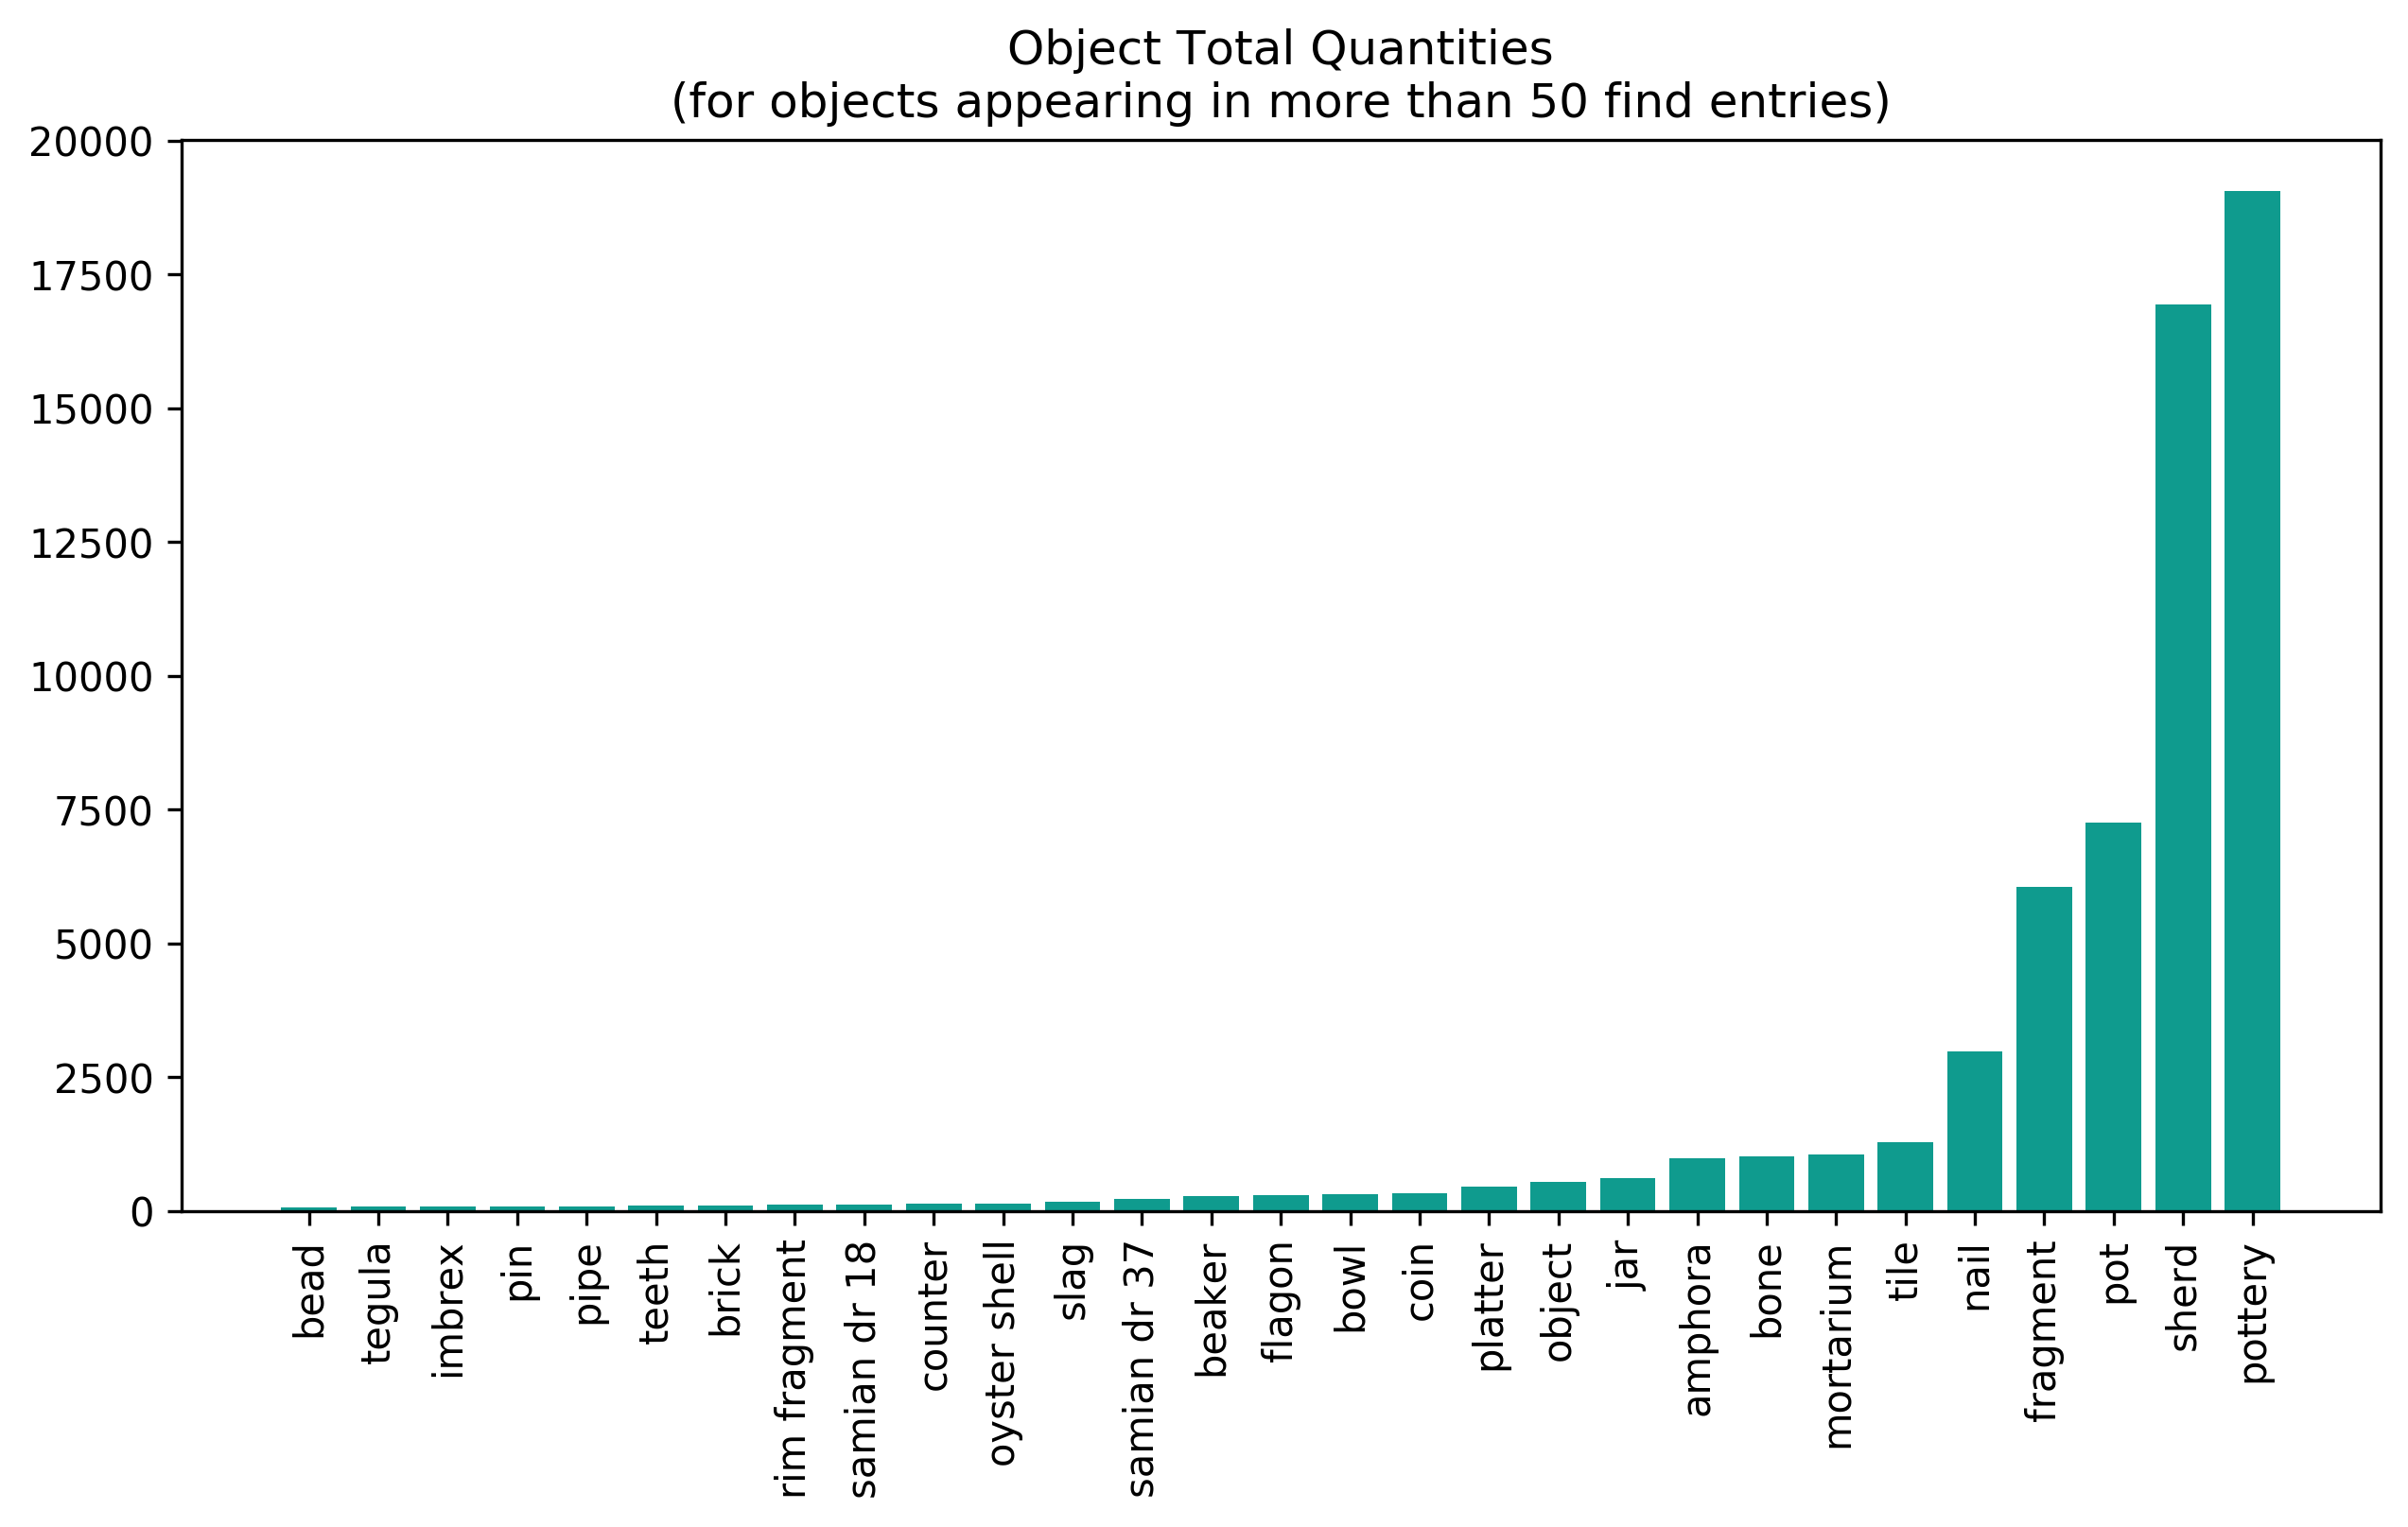

In [22]:
plt.figure(figsize=(10,5), dpi=300)
plt.bar(object_total_quantities_plot.keys(), object_total_quantities_plot.values(), color='xkcd:blue/green')
plt.xticks(rotation=90)
plt.title('Object Total Quantities\n(for objects appearing in more than 50 find entries)')
plt.show()

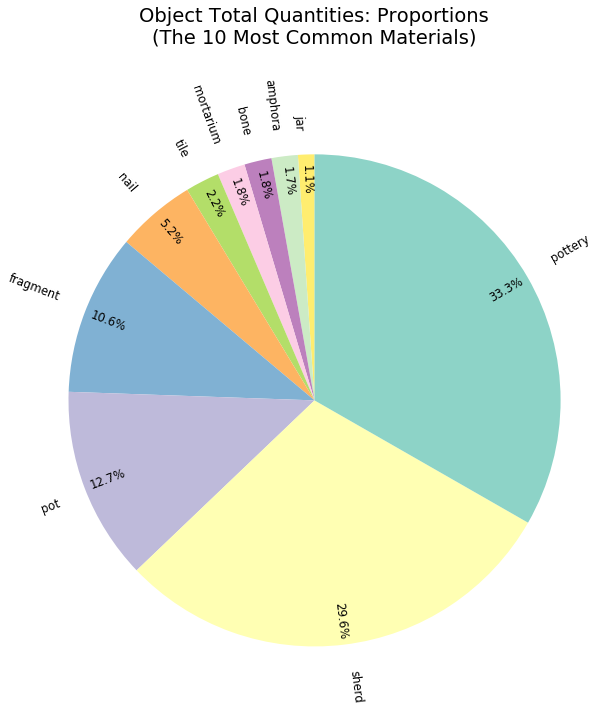

In [23]:
data = object_total_quantities_plot
n = 10
title = 'Object Total Quantities: Proportions\n(The %d Most Common Materials)\n\n\n\n' % n
plot_pie(data, n, title)

**Takeaways:** According to the quantities we extracted, archaeologists at Corbridge found way more coins than any other object.

### Plot object total quantities as a word cloud

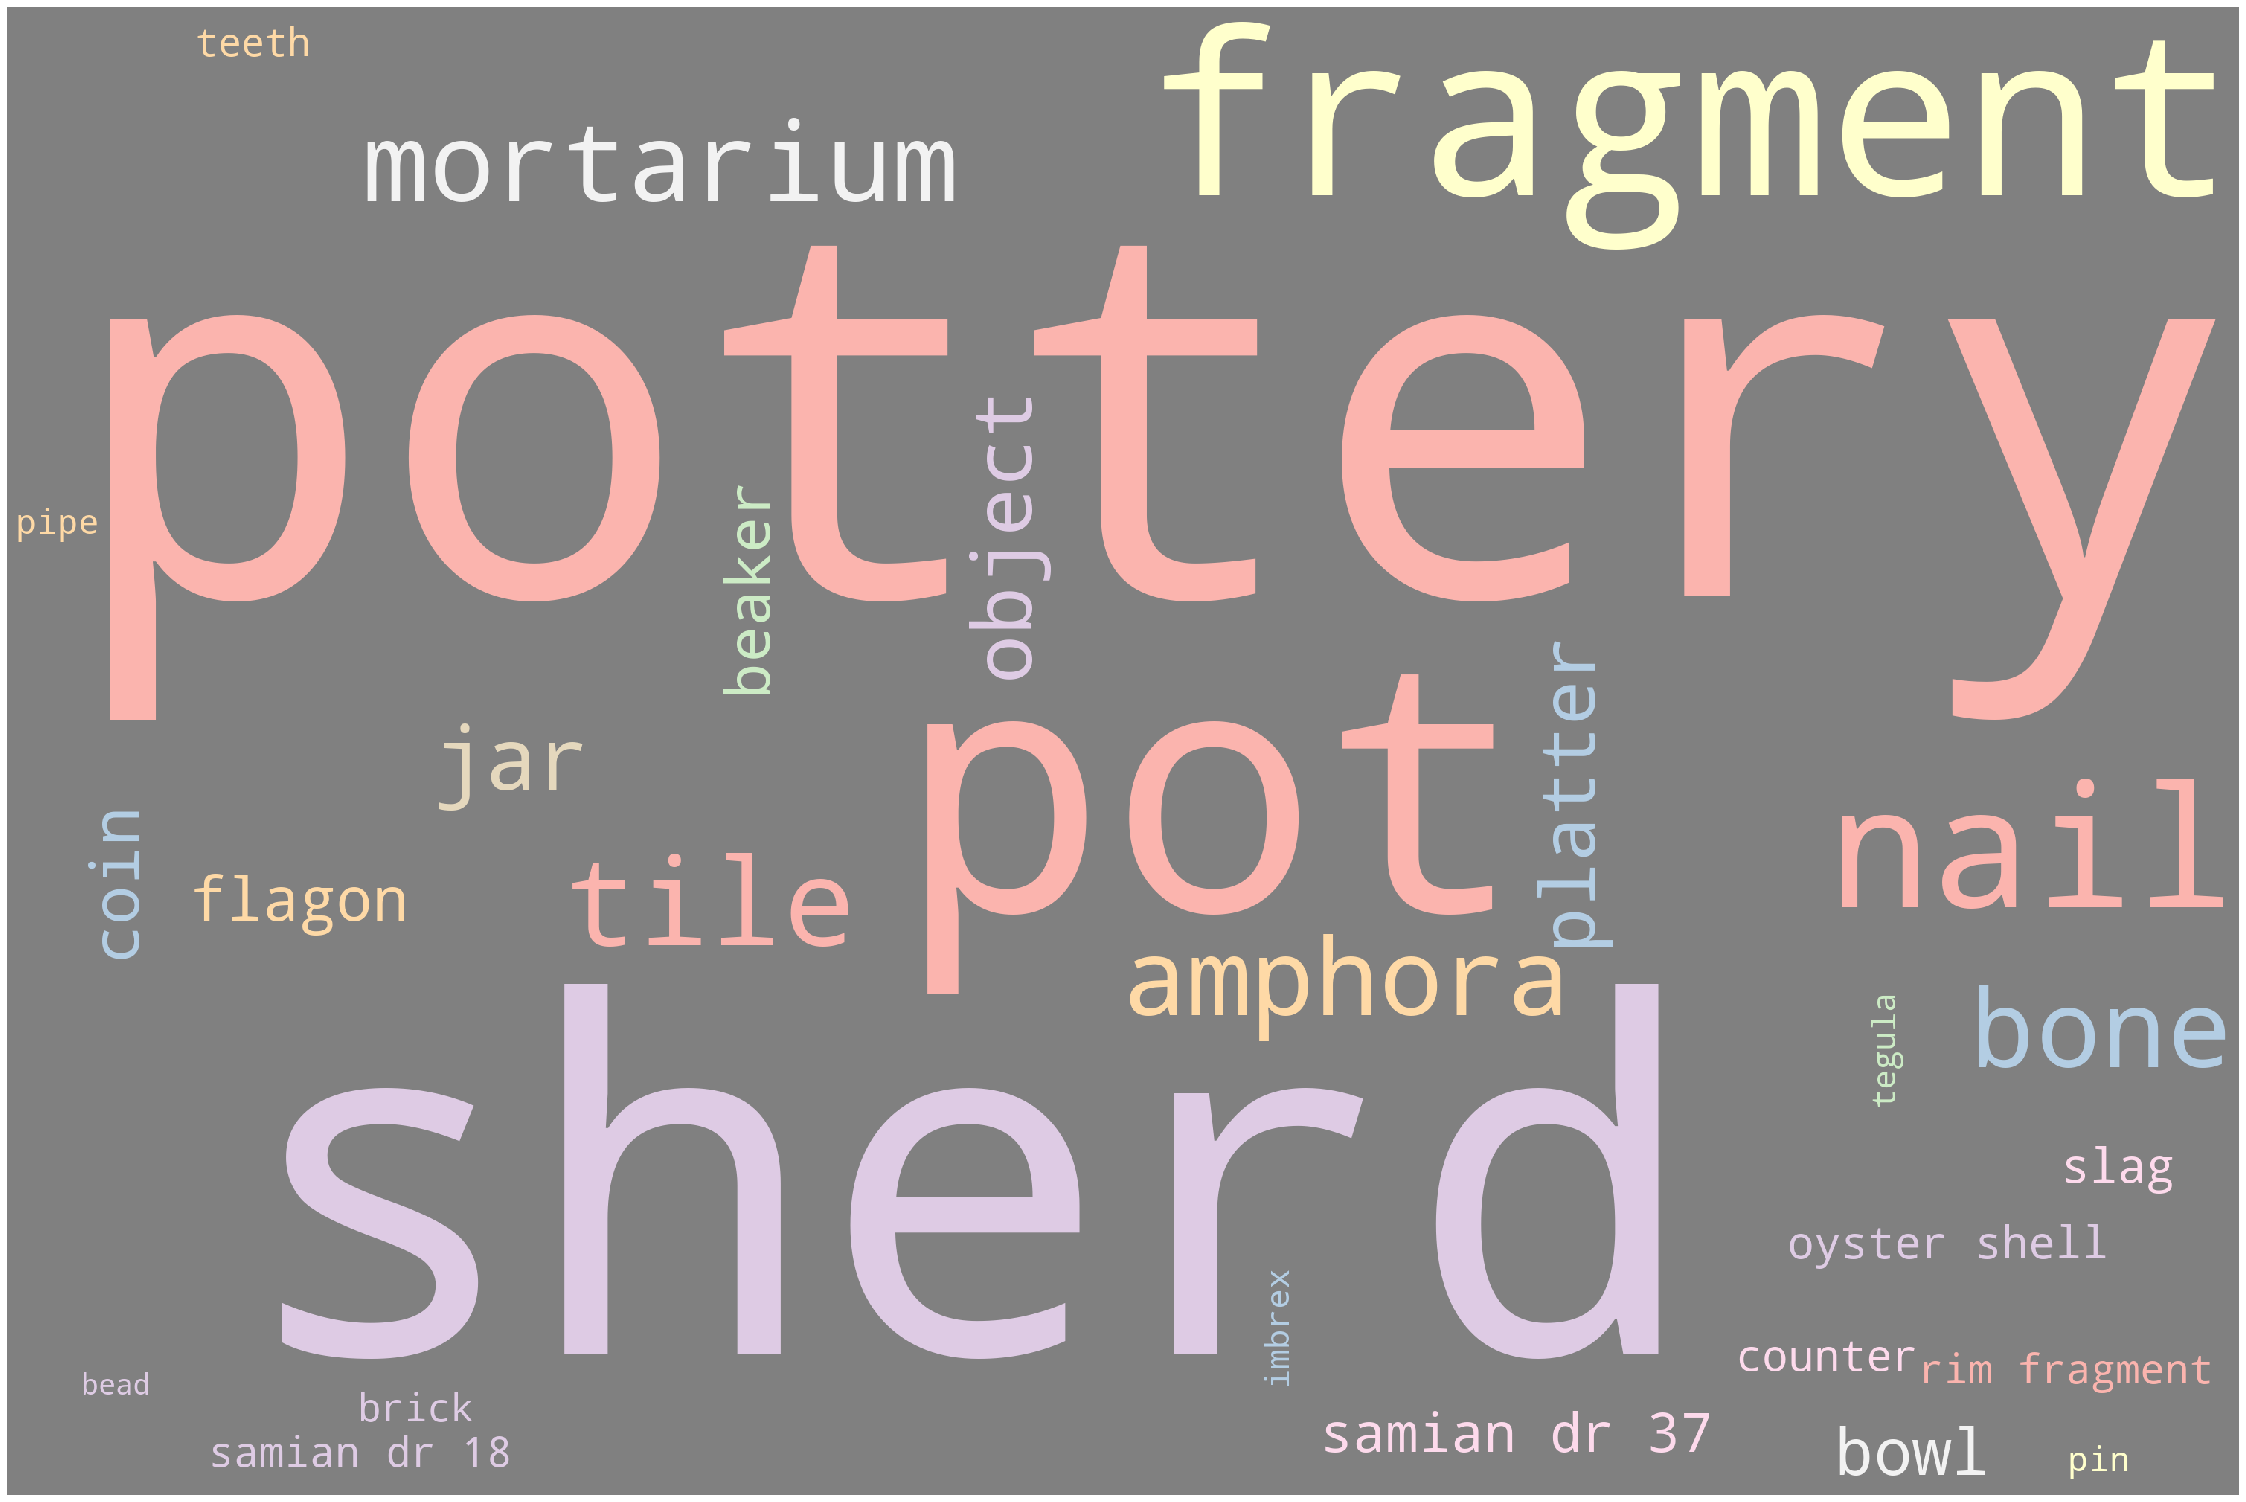

In [24]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1,
                  background_color='gray', colormap='Pastel1',
                  collocations=False, stopwords = STOPWORDS)
wordcloud.generate_from_frequencies(object_total_quantities)
# Set figure size
plt.figure(figsize=(40, 30))
# Display image
plt.imshow(wordcloud) 
# No axis details
plt.axis("off")
plt.show()